# Analysis of International Football Matches Between 1872 and 2018 (40,000+ Matches)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, patches
from matplotlib.transforms import Bbox
import seaborn as sns
from datetime import datetime
import squarify
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

colors = ["#849db1", "#a2ceaa", "#638b66", "#bfbb60", "#f47942", "#fbb04e", "#b66353", "#d7ce9f", "#b9aa97", 
          "#7e756d", "#4E79A7", "#A0CBE8", "#F28E2B", "#FFBE7D", "#59A14F", "#8CD17D", "#B6992D", "#F1CE63", 
          "#499894", "#86BCB6", "#E15759", "#FF9D9A", "#79706E", "#BAB0AC", "#D37295", "#FABFD2", "#B07AA1", 
          "#D4A6C8", "#9D7660", "#D7B5A6"]*20
colors2 = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
colors_dsl = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", "#9e9d24", "#5c6bc0", 
              "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", 
              "#9e9e9e", "#607d8b"]
colors_tb = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F", "#BAB0AC"]

# plot configuration
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=100)
plt.rc('savefig', dpi=100)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]
def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    # ax.grid(True, color='#4d4a50')
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## Reading the data

In [2]:
df = pd.read_csv('../input/international-football-results-from-1872-to-2017/results.csv')

In [3]:
df.shape

(41540, 9)

We can see that the dataset contains 40,839 rows and 9 columns (i.e. attributes).

## Taking a Look at the Data

In [4]:
df.head(n=10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


According to the creator of the dataset, the meaning of each column is as follows:
* `date`: date of the match
* `home_team`: the name of the home team
* `away_team`: the name of the away team
* `home_score`: full-time home team score including extra time, not including penalty-shootouts
* `away_score`: full-time away team score including extra time, not including penalty-shootouts
* `tournament`: the name of the tournament
* `city`: the name of the city/town/administrative unit where the match was played
* `country`: the name of the country where the match was played
* `neutral`: a column indicating whether the match was played at a neutral venue

## Notes on the Dataset

The creator of the dataset also mentions some notes on team and country names. Regarding `home_team` and `away_team` columns he says: 

> For home and away teams the current name of the team has been used. 

Let's clarify that with example:


In [5]:
df[(df['home_team'] == 'Northern Ireland') & (df['date'].str.startswith('1882'))]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
19,1882-02-18,Northern Ireland,England,0,13,Friendly,Belfast,Republic of Ireland,False


The creator of the dataset describes this example:

>When in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team.

Regarding the `country` column, he says:

>For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

Let's show this Accra, Gold Coast example:

In [6]:
df[(df['home_team'] == 'Ghana') & (df['date'].str.startswith('1950'))]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3099,1950-05-28,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,False


So in this example, the match took place in a country that *was* called "Gold Coast"; the home team in this match is *now* called Ghana but Gold Coast is the old name of what we call today Ghana; that's why the value of the column `neutral` is `False` for this match — it means that the home team in this match played the match in his own country.

I don't know why the creator of the dataset used the current name for `home_team` and `away_team` columns but the old name for the `country` column. It would be better, in my opinion, if he used the current name for `country` column too.

However, **let's start the analysis**.

## Data Cleaning
First, let's see if our dataset contains any missing value:

In [7]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

We can see the all columns are complete: no missing values.

### Removing 2019 Matches
This dataset was last updated approximately in 2019. This means that 2019 data is not complete yet. So, we will remove 2019 matches from the dataset for consistency.

In [8]:
df = df[~df['date'].str.startswith('2019-')]

After removing 2019 matches, let's see the new number of rows in the dataset:

In [9]:
df.shape[0]

40407

# The Number of Matches for Each Tournament
Let's see how many matches for each tournament in the dataset:

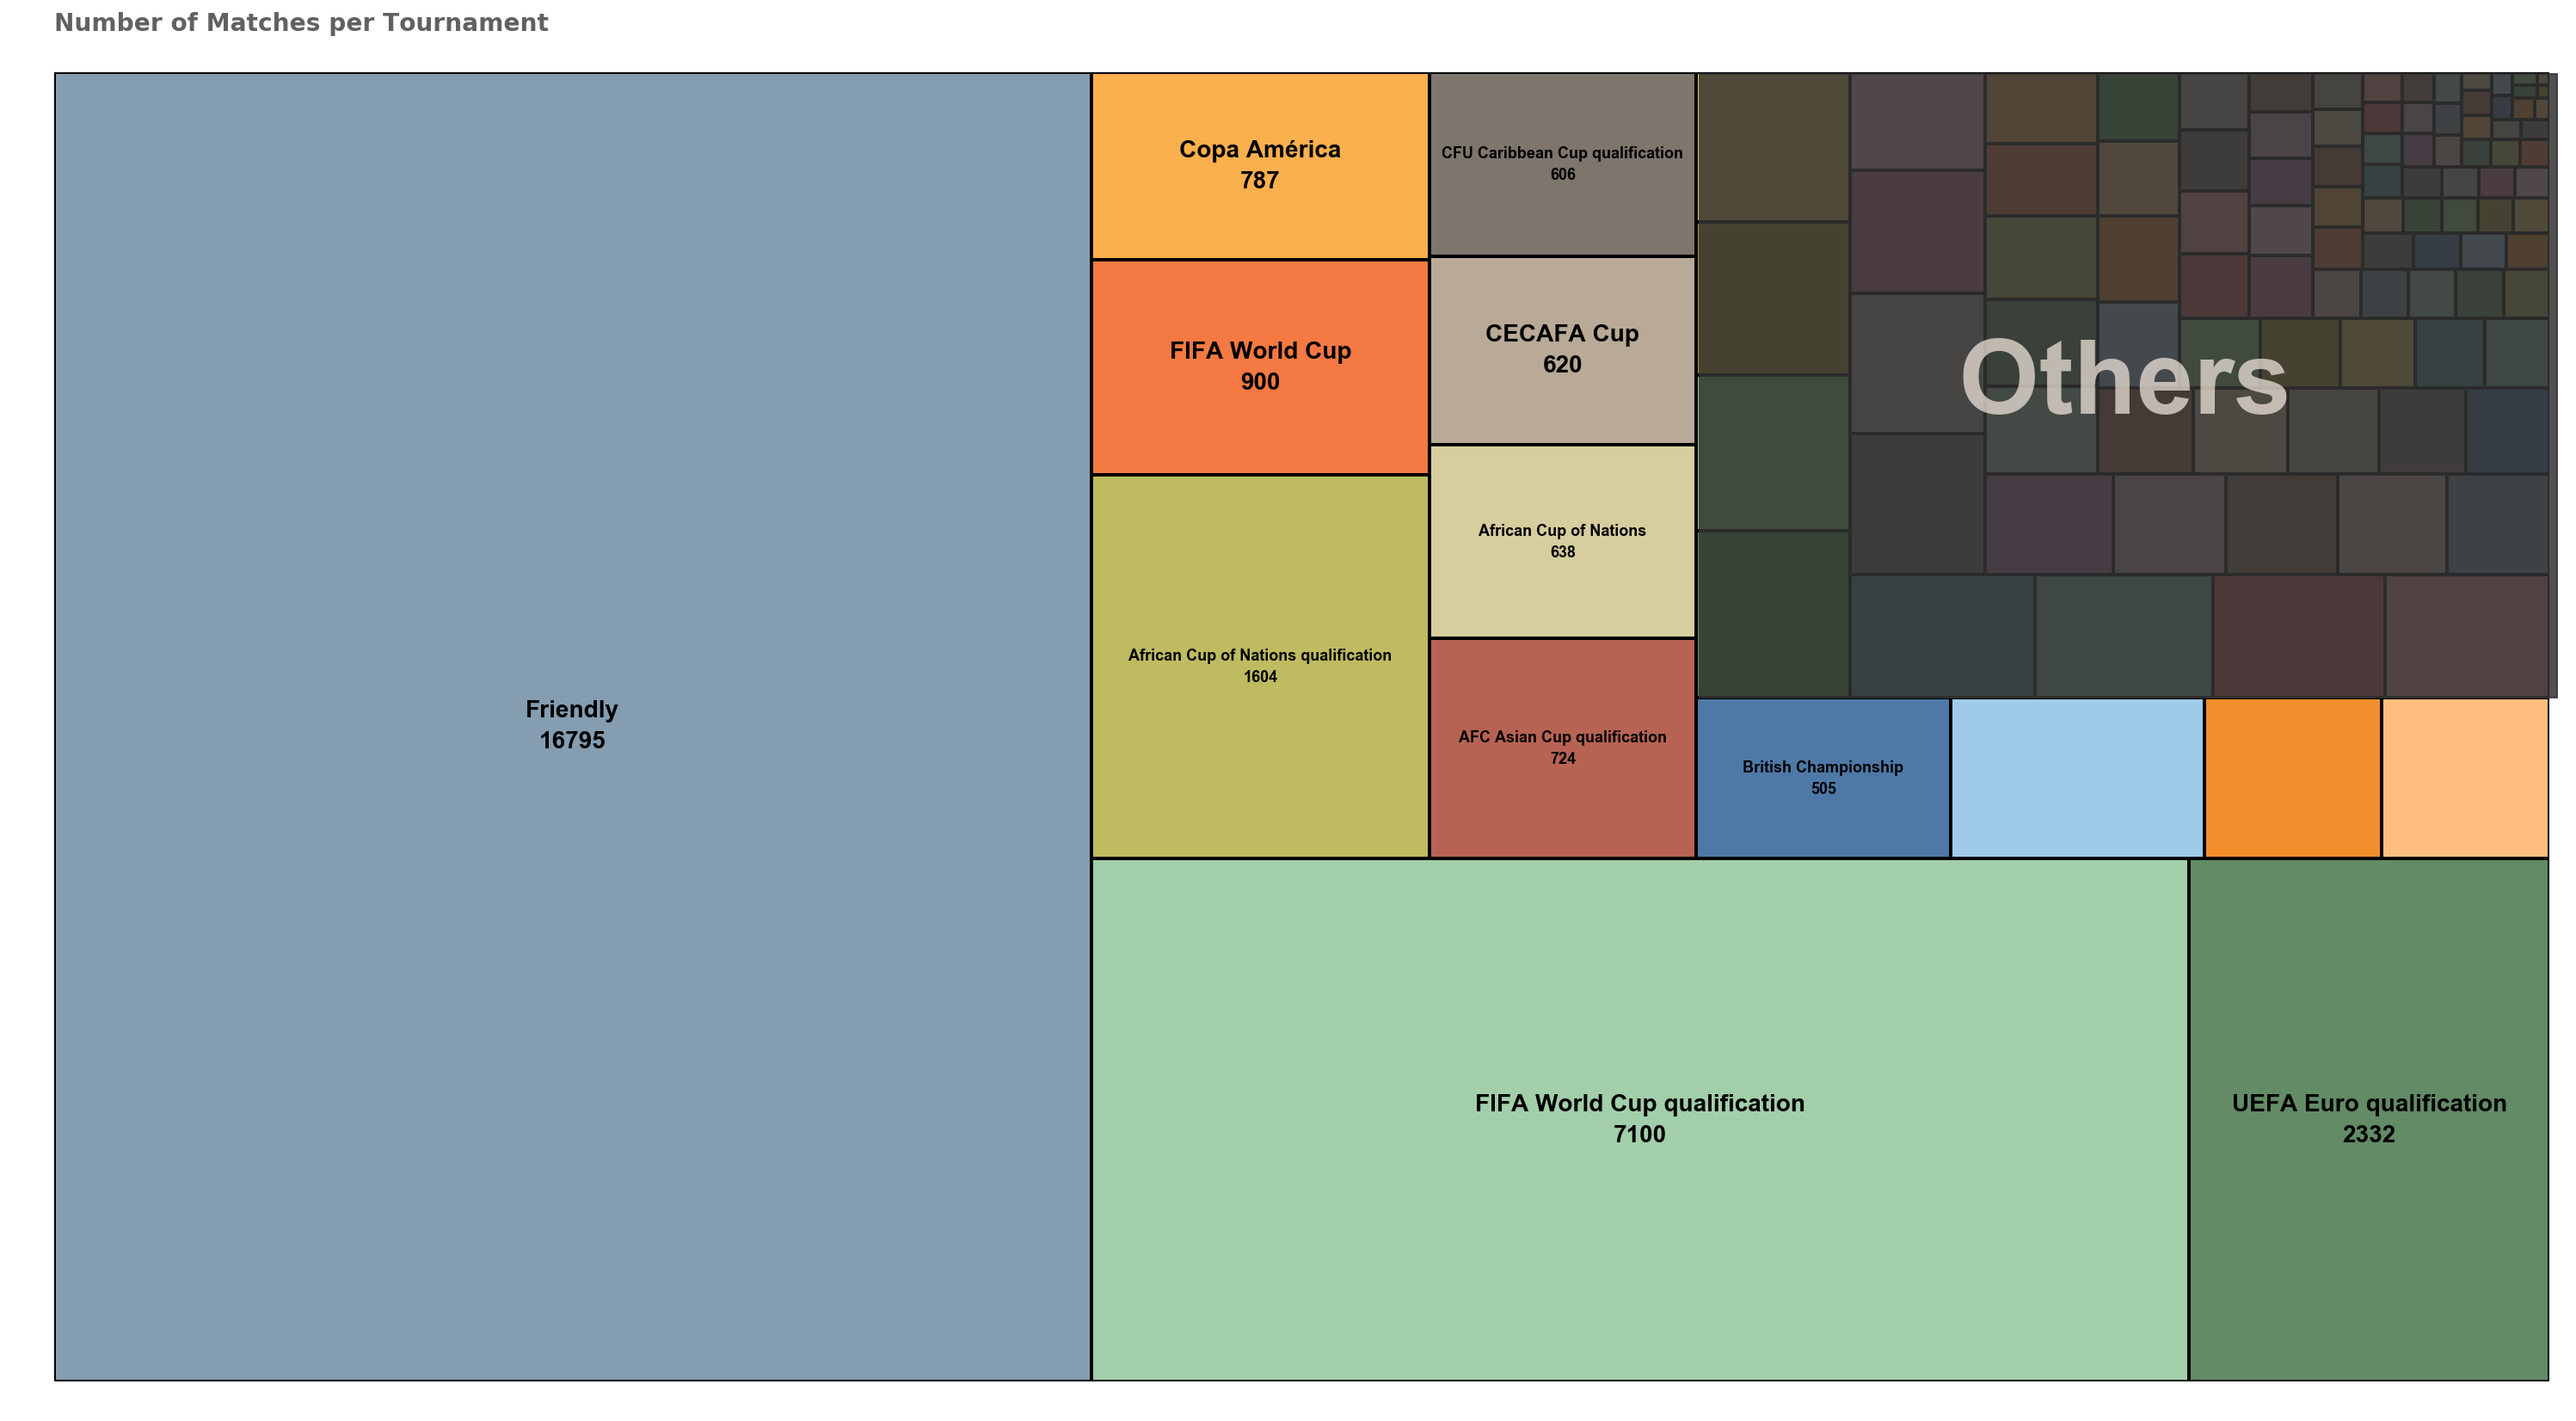

In [10]:
tournament_counts = df['tournament'].value_counts().sort_values(ascending=False)
tournament_counts.to_frame(name="Count")

# drawing a treemap plot
fig, ax = plt.subplots(figsize=(26,14));
x = 0.
y = 0.
width = 700.
height = 433.
values = tournament_counts.values
values = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(values, x, y, width, height)
ax.set_xlim(left=0, right=700)
ax.set_ylim(bottom=0, top=433)
for i, rect in enumerate(rects):
    rect_patch = patches.Rectangle((rect['x'],rect['y']), rect['dx'], rect['dy'], linewidth=2, 
                                   edgecolor='#000000',facecolor=colors[i])
    ax.add_patch(rect_patch)
    if values[i]/np.max(values) > 0.03:
        # controlling font size based on the space available for each item
        if values[i]/np.max(values) > 0.13 or len(tournament_counts.index[i]) < 20:
            fsize = 14
        else:
            fsize = 9
        ax.annotate(tournament_counts.index[i]+'\n'+str(tournament_counts.values[i]), 
                    (rect['x']+rect['dx']/2, rect['y']+rect['dy']/2), ha='center', ma='center',
                     va='center', fontsize=fsize, linespacing=1.5, fontweight='bold', family='Arial')
plt.axis('off');
plot_conf(ax, xlbl='', ylbl='', t='Number of Matches per Tournament')
ax.annotate('\n' + ' '*9 + 'Others' + ' '*9 + '\n', (0.83, 0.76), xycoords='axes fraction', fontsize=60, fontweight='bold', 
            family='Arial', rotation=0, alpha=0.7, ha='center', ma='center', va='center', linespacing=3.2, 
            clip_box=Bbox(((1975,100),(4120,10000))), backgroundcolor='#333333da', color='#F8EDE3');
plt.savefig('fban-tour-matches.png', dpi=300)

We can see that friendly matches are, by far, the most common matches in the dataset (16226 matches), followed by FIFA World Cup qualification matches (7100), then UEFA Euro qualification matches (2332), then African Cup of Nations qualification matches (1558), then FIFA World Cup matches (836), and so on.

# Which Year Had The Largest Number of Matches?
We will use the `date` column to answer this question. To make better use of the `date` column, we will split it into three columns: one for day, one for month, and one for year:

In [11]:
splitted_date = df['date'].str.split('-')
# print the first three items of splitted_date
splitted_date[:3]

0    [1872, 11, 30]
1    [1873, 03, 08]
2    [1874, 03, 07]
Name: date, dtype: object

We can see that `splitted_date` contains lists where each list contains the year, month, and day of the match. Now, we will create our new columns using these lists:

In [12]:
# creating year column
df['year'] = [x[0] for x in splitted_date]
# creating month column
df['month'] = [x[1] for x in splitted_date]
# creating day column
df['day'] = [x[2] for x in splitted_date]

Now let's look at the dataframe after adding these columns:

In [13]:
df.head(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,04
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,03,25
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,03,03


Now, let's see the number of matches in each year:

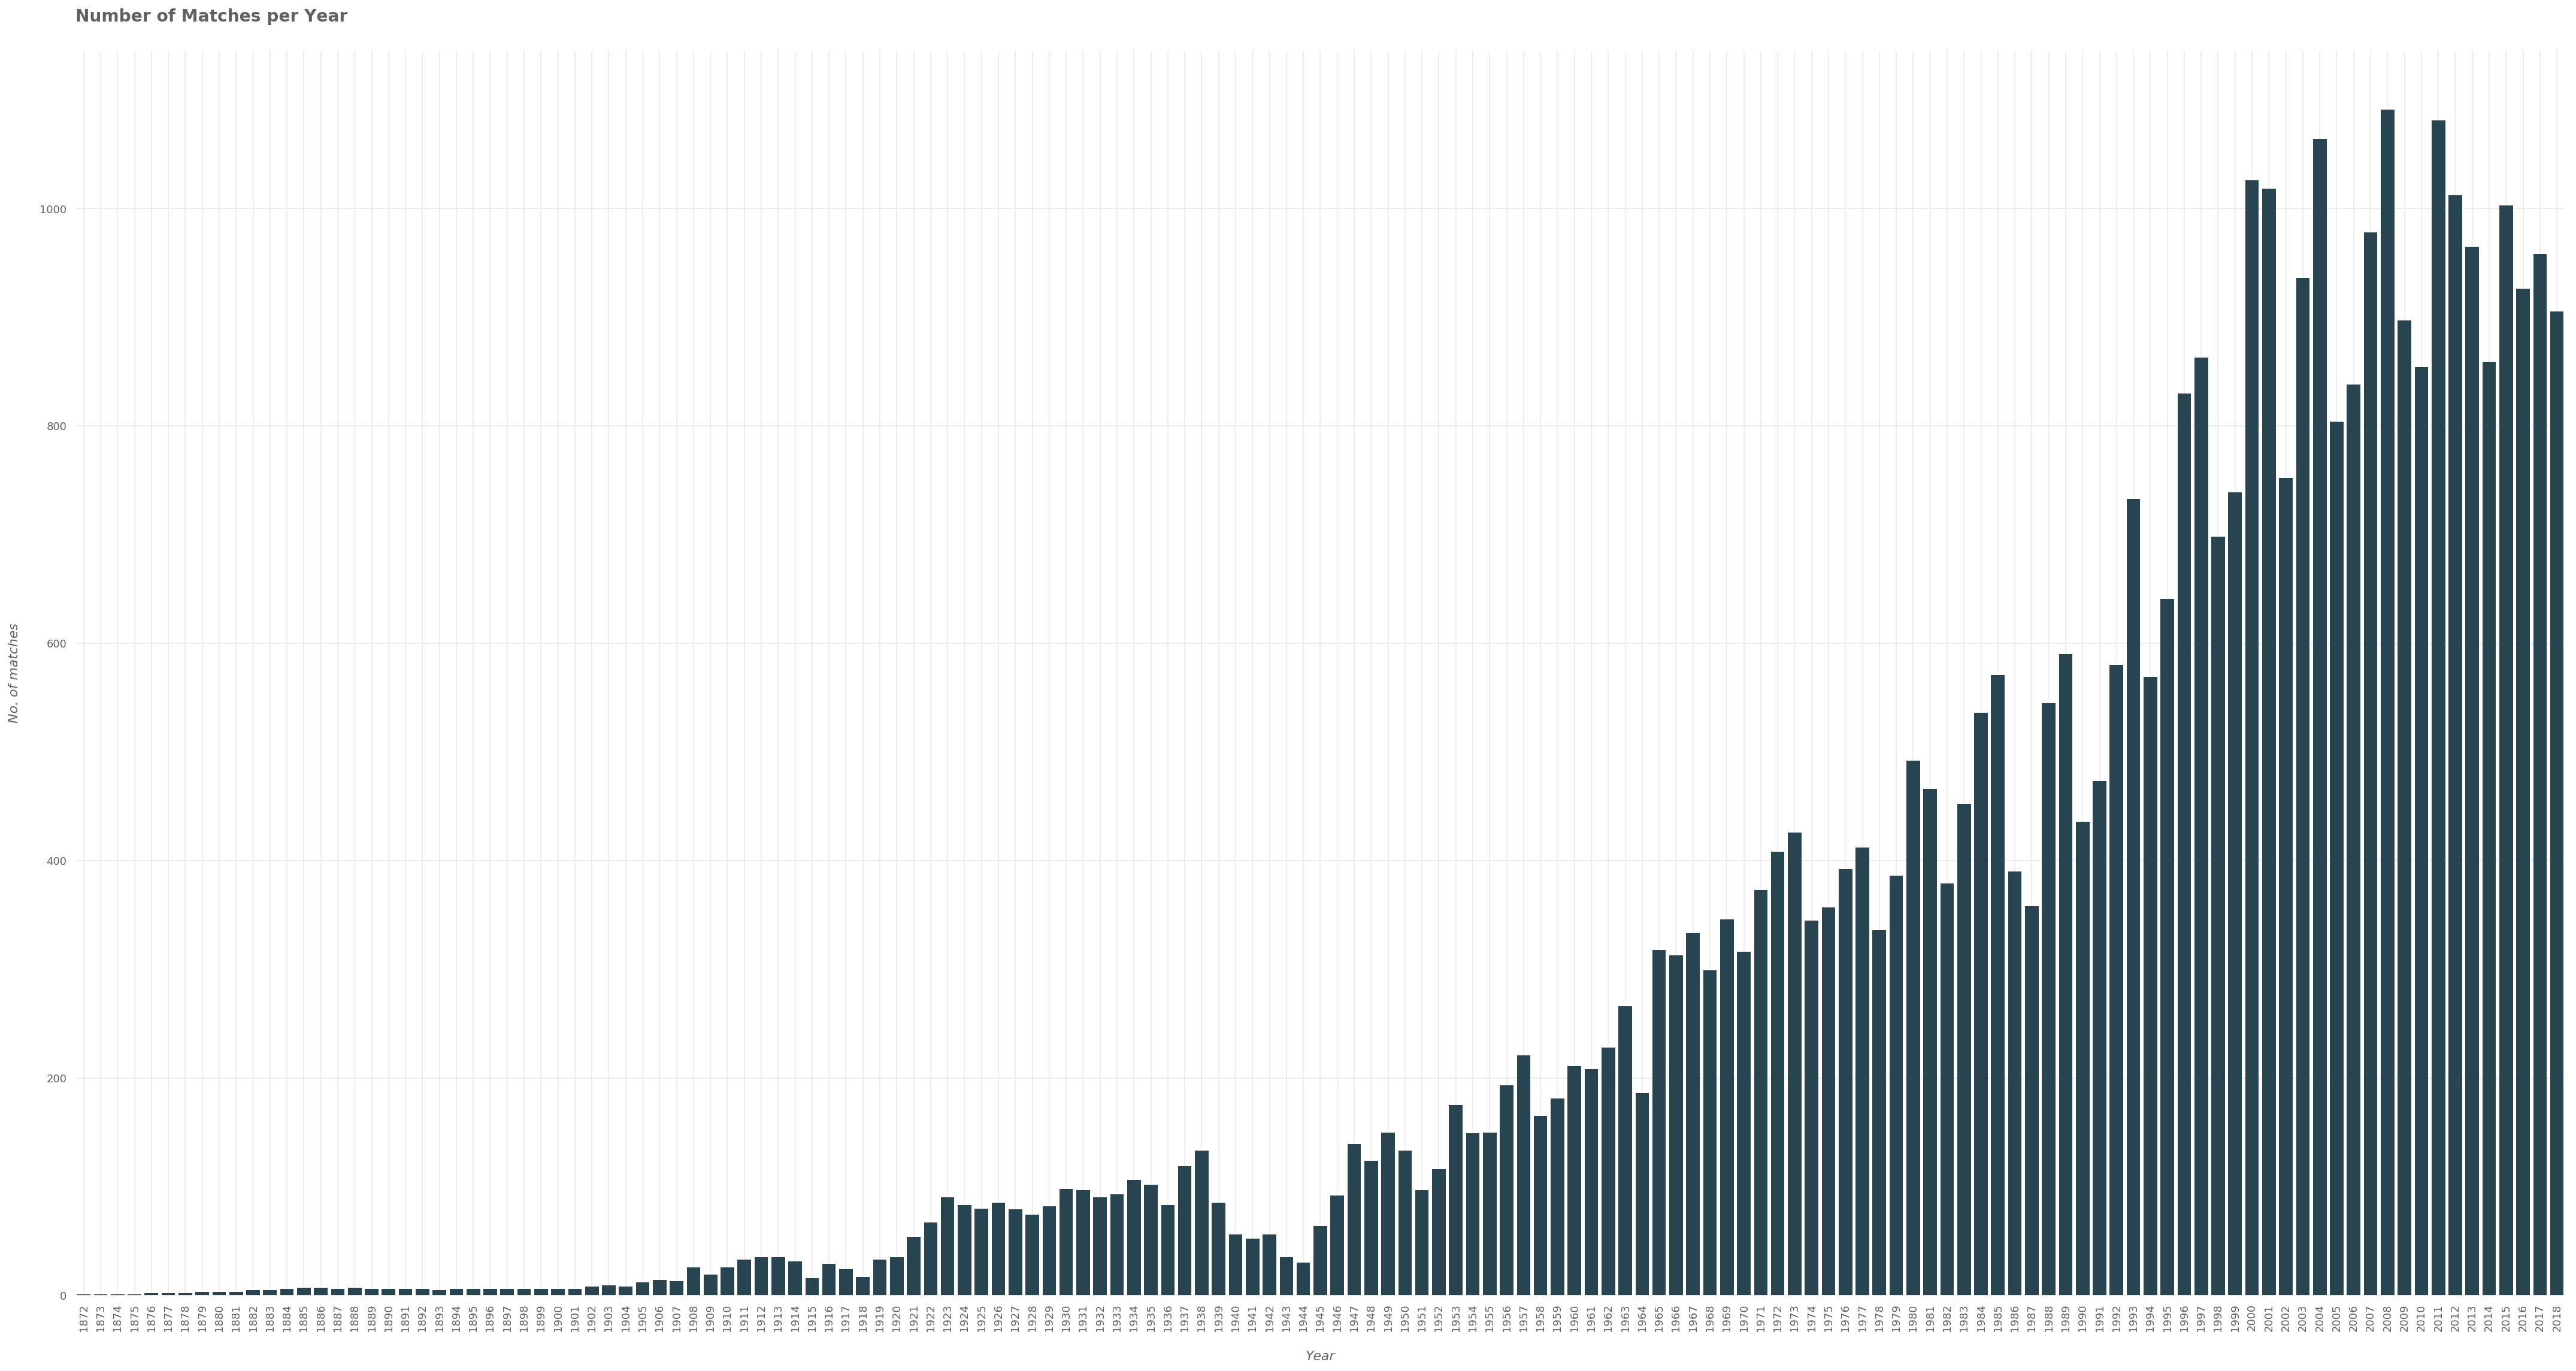

In [14]:
# get the number of matches in each year
year_counts = df['year'].value_counts()
# use a bar plot to show the distribution
fig, ax = plt.subplots(figsize=(30,16));
sns.barplot(x=year_counts.index, y=year_counts, ax=ax, color='#214658', linewidth=0);
# ax = year_counts.plot(kind='barh', figsize=(15,30))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plot_conf(ax, xlbl='Year', ylbl='No. of matches', t='Number of Matches per Year')
plt.tight_layout()
plt.savefig('fban-years.png', dpi=300)

We can see that generally the number of matches increases over the years. And the year with the largest number of matches is:

In [15]:
# find the year with the largest number of matches
year_counts.sort_values(ascending=False).index[0]

'2008'

In [16]:
# find the number of matches in 2008
year_counts.sort_values(ascending=False)['2008']

1091

So it is the year 2008 with 1087 matches.

# Which Month of the Year Had The Largest/Smallest Number of Matches?
Now, in a similar way, let's see which month of the year had the largest number of matches. Let's see the number of matches played in each month over the years:

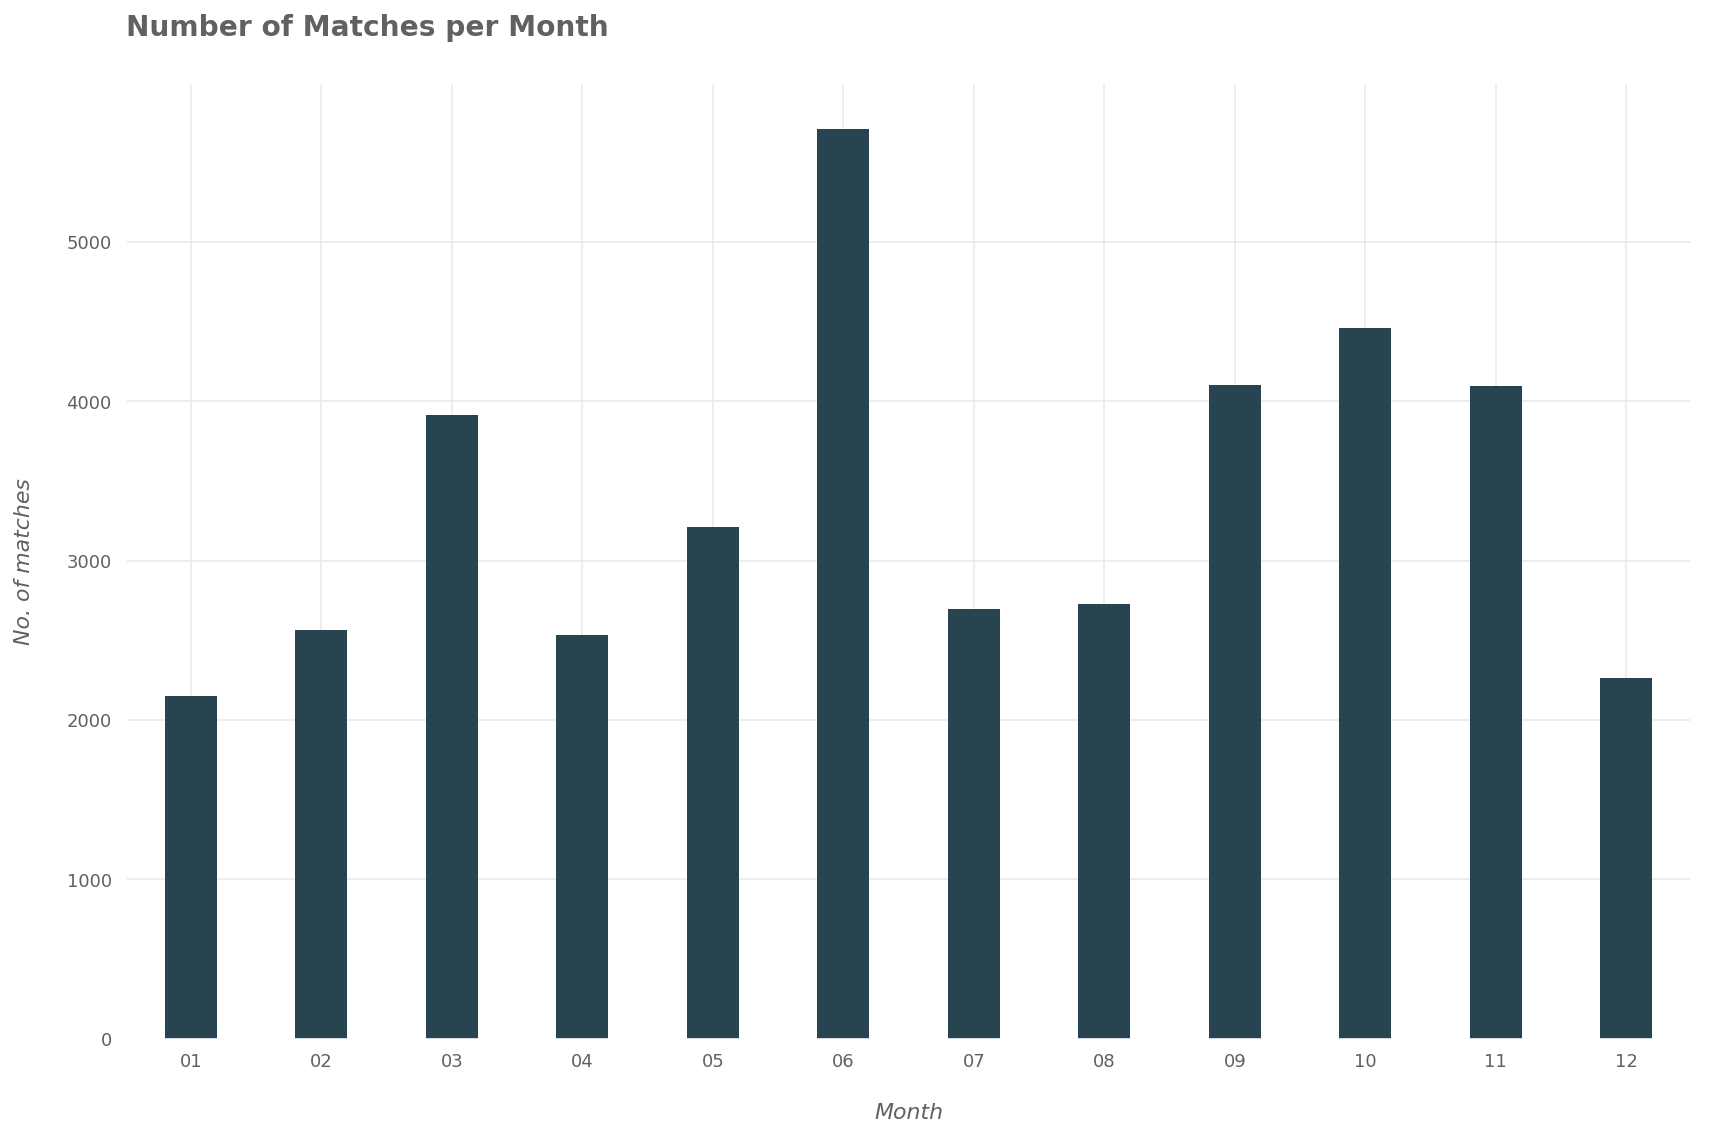

In [17]:
# get the number of matches in each month of the year
month_counts = df['month'].value_counts()
# use a bar plot to show the distribution
fig, ax = plt.subplots(figsize=(12,8));
sns.barplot(x=month_counts.index, y=month_counts, ax=ax, color='#214658');
plot_conf(ax, xlbl='Month', ylbl='No. of matches', t='Number of Matches per Month')
change_width(ax, .4)
plt.tight_layout()
plt.savefig('fban-months.png', dpi=300)

We can see that the sixth month, June, had the largest number of matches and that January had the smallest number of matches. Let's find exactly the total number of matches played in each of June and January:

In [18]:
month_counts[month_counts == month_counts.max()]

06    5706
Name: month, dtype: int64

In [19]:
month_counts[month_counts == month_counts.min()]

01    2148
Name: month, dtype: int64

So since 1872 and until 2017, 5530 matches were played in June while 2099 matches were played in January.

# Which Day of the Week Had The Largest/Smallest Number of Matches?
Now let's find out which days of the week had the largest and smallest number of matches. Although our dataset includes the date of each match, it doesn't include data about the day of the week (like Sunday, Monday, etc.) for each match. So, we will use Python `datetime` module to extract the day of the week from the date of the match. We will store the day of the week for each match in a new column named `day_of_the_week`:

## Creating day_of_the_week Variable

In [20]:
# get the day of the week as a number where 0 represents Monday and 6 represents Sunday
df['day_of_the_week'] = df['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d').weekday())
# convert the number to an English representaion
week_days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_the_week'] = df['day_of_the_week'].map(week_days)

In [21]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,day_of_the_week
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,08,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,07,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,06,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,04,Saturday


Now we can see which day had the largest number of matches and which day had the lowest number of matches:

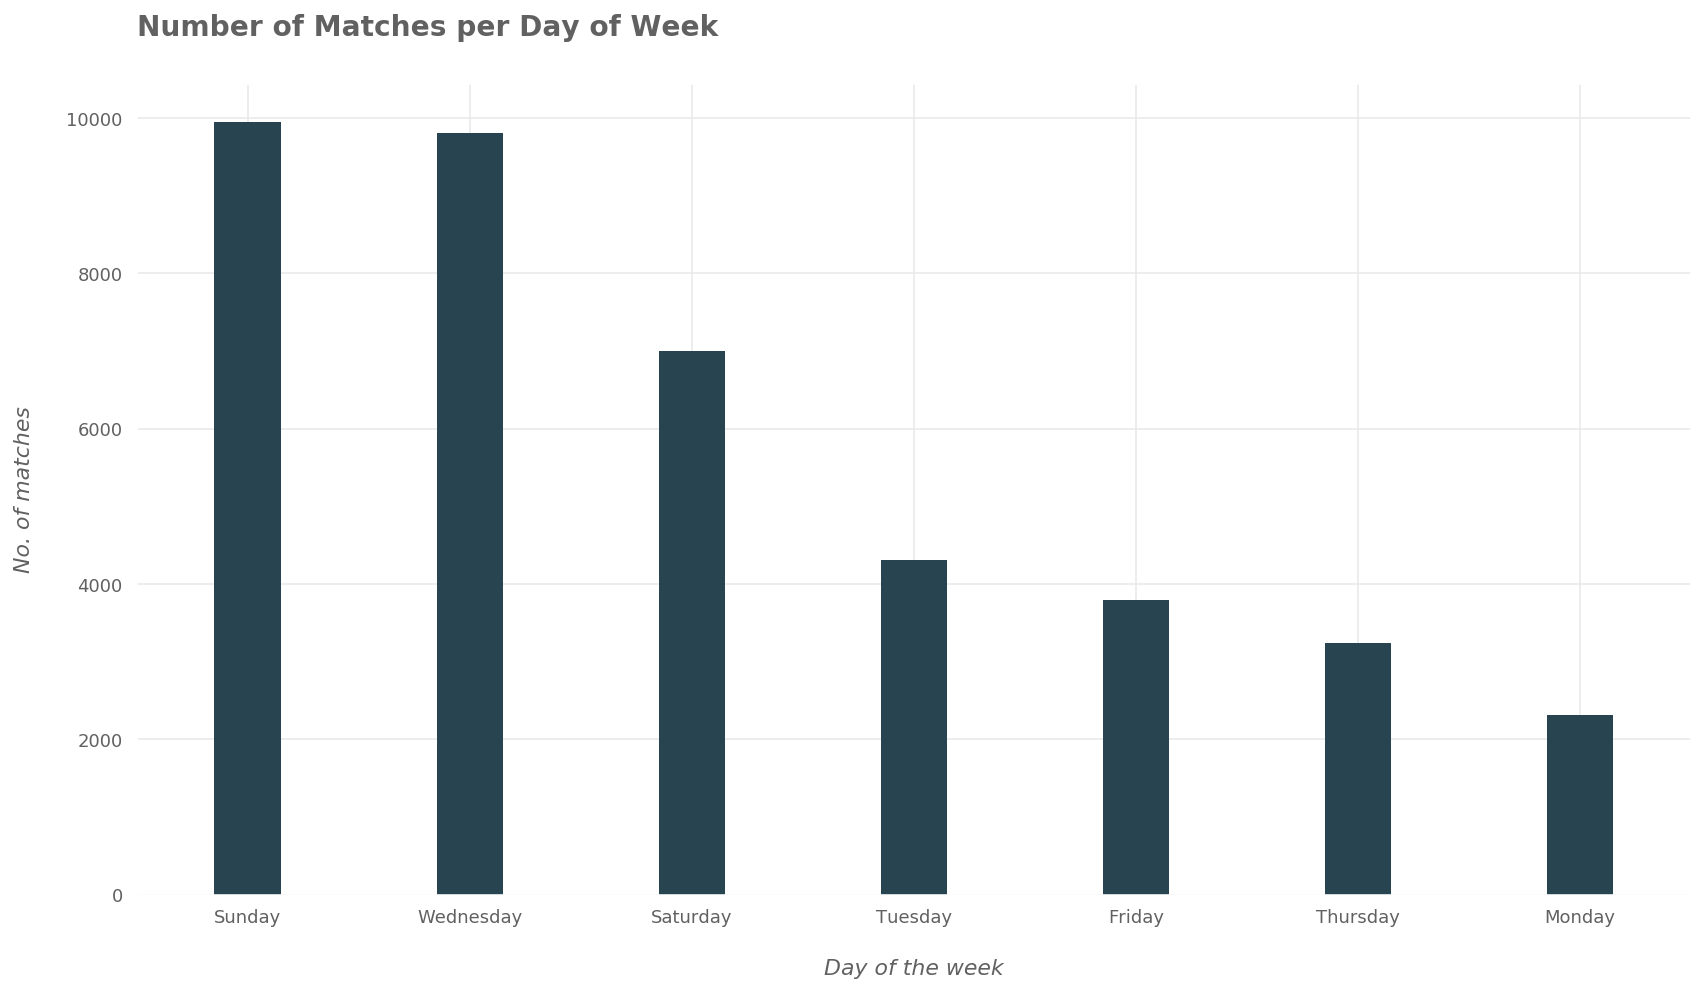

In [22]:
# get the number of matches in each day of the week
week_day_counts = df['day_of_the_week'].value_counts()
# use a bar plot to show the distribution
fig, ax = plt.subplots(figsize=(12,7));
sns.barplot(x=week_day_counts.index, y=week_day_counts, ax=ax, color='#214658');
plot_conf(ax, xlbl='Day of the week', ylbl='No. of matches', t='Number of Matches per Day of Week')
change_width(ax, .3)
plt.tight_layout()
plt.savefig('fban-day.png', dpi=300)

In [81]:
week_day_counts

Sunday       9943
Wednesday    9808
Saturday     7004
Tuesday      4310
Friday       3789
Thursday     3240
Monday       2313
Name: day_of_the_week, dtype: int64

We can see that Sunday and Wednesday had the largest number of matches (Sunday had slightly more matches than Wednesday), while Monday had the smallest number of matches. We notice that the difference is significant: Sunday and Wednesday each had around 10000 matches while Monday had only around 2000 matches. Maybe this is because Sunday is a weekend day and Monday is the first workday in many countries, but that leaves a question: why Wednesday had as many matches as Sunday in this case?



# Which Country Hosted the Largest Number of Matches?
Now, let's move from dates and days to see which country hosted the largest number of matches. Let's plot a [treemap plot](https://en.wikipedia.org/wiki/Treemapping) showing the 30 countries that hosted the largest number of matches. The size of the box in the treemap represents the number of matches the corresponding country hosted:

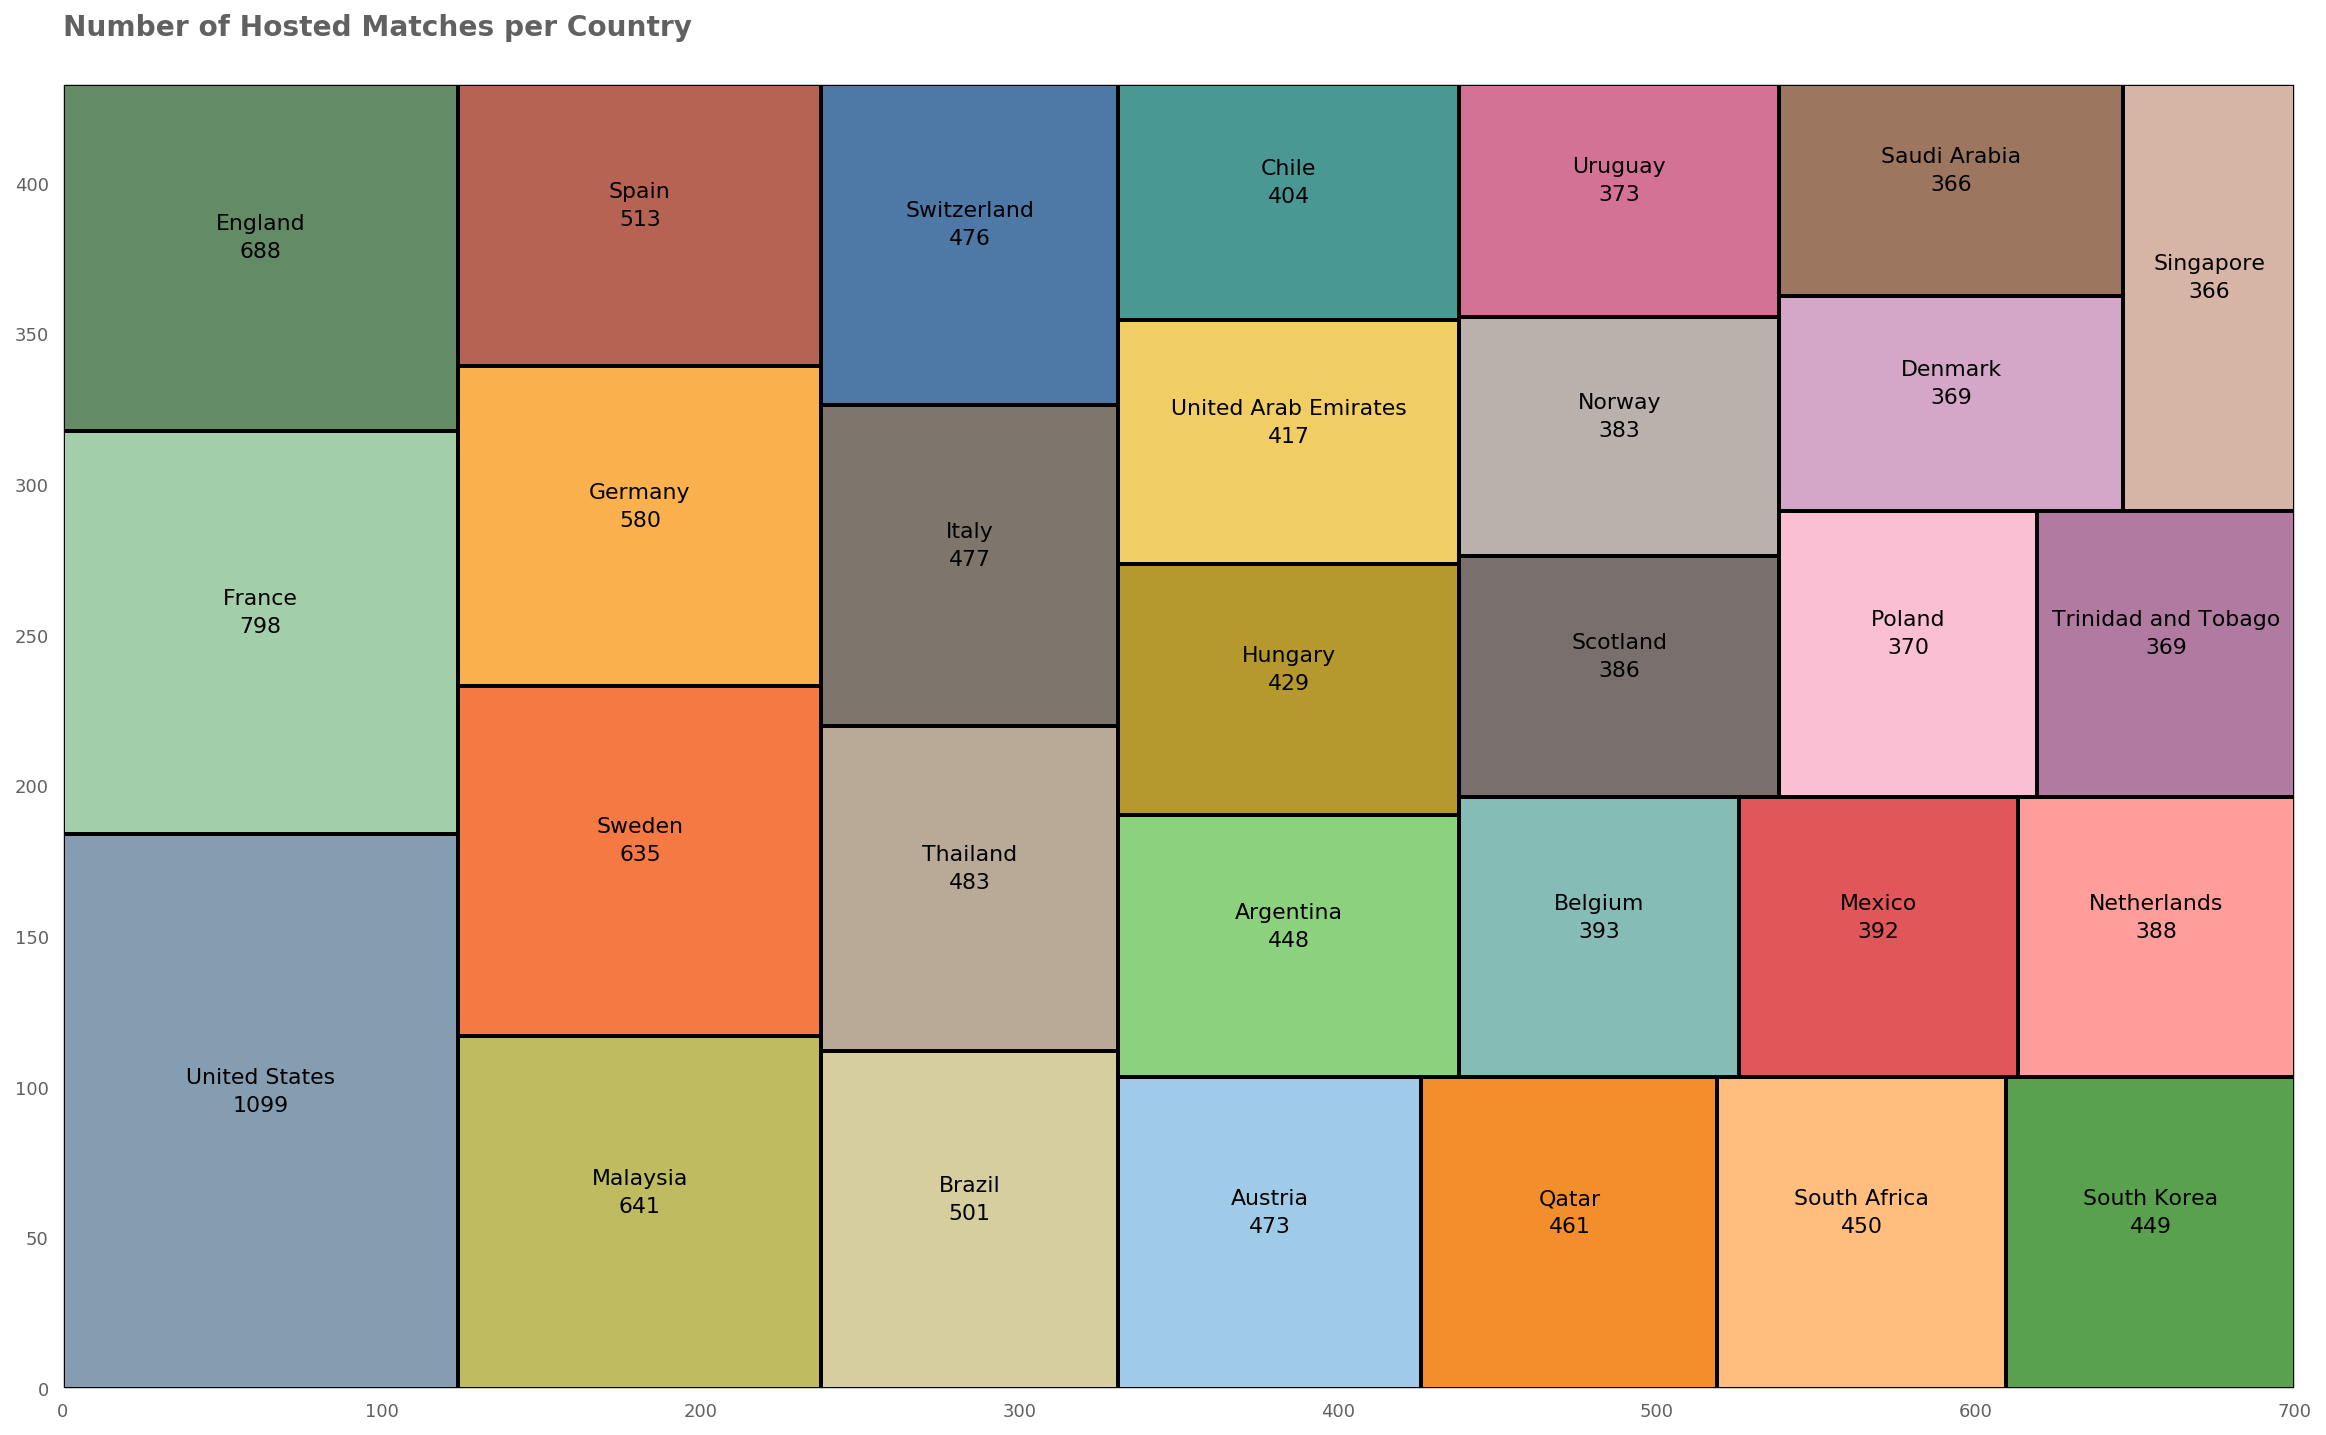

In [23]:
country_counts = df['country'].value_counts().sort_values(ascending=False).head(30)
fig, ax = plt.subplots(figsize=(20,12));
# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.
values = country_counts.values
values = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(values, x, y, width, height)
ax.set_xlim(left=0, right=700)
ax.set_ylim(bottom=0, top=433)
for i, rect in enumerate(rects):
    rect_patch = patches.Rectangle((rect['x'],rect['y']), rect['dx'], rect['dy'], linewidth=2, 
                                   edgecolor='#000000',facecolor=colors[i])
    ax.add_patch(rect_patch)
    if values[i]/np.max(values) > 0.04:
        ax.annotate(country_counts.index[i]+'\n'+str(country_counts.values[i]), 
                    (rect['x']+rect['dx']/2, rect['y']+rect['dy']/2), ha='center',
                    fontsize=11, linespacing=1.5)
plot_conf(ax, t='Number of Hosted Matches per Country')

We can see that USA is the country that hosted matches more than the others, followed by France then Malaysia. This is unexpected to me because I think that USA people have low interest in this sport. So let's examine the categories of the matches hosted by USA; let's see the number of matches for each tournament:

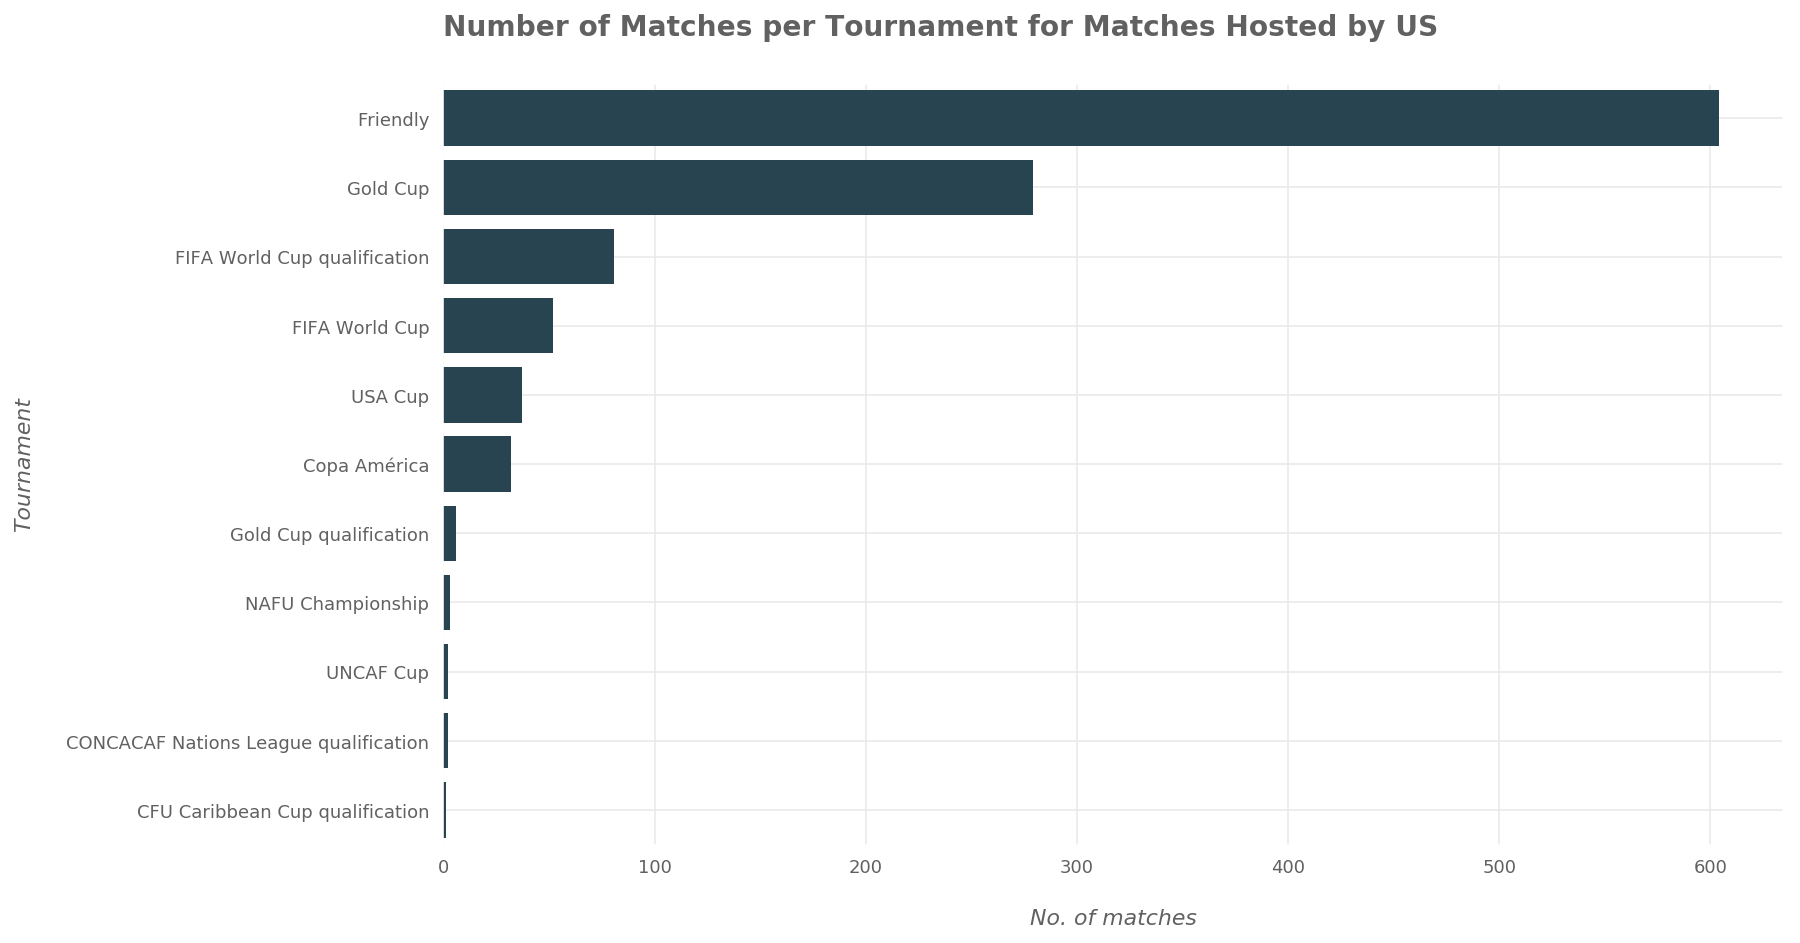

In [24]:
cdf = df[df['country'] == 'United States'].groupby('tournament').size()\
        .sort_values(ascending=False).reset_index()
cdf.columns = ['tournament', 'count']
fig, ax = plt.subplots(figsize=(12,7));
sns.barplot(x=cdf['count'], y=cdf['tournament'], ax=ax, orient='h', color='#214658');
plot_conf(ax, xlbl='No. of matches', ylbl='Tournament', t='Number of Matches per Tournament for Matches Hosted by US')

We can see the most matches hosted by USA are friendly matches (non-tournament matches). We can see also that a significant number of hosted matches falls under Gold Cup tournament; with a simple search, we can find that Gold Cup is a tournament for teams from North America, Central America, and the Caribbean and that it is held every two years.

## Which Team Played the Largest Number of Matches?
Now let's see which team played the highest number of matches in total (as a home team or as an away team). We will show the top 10 teams:

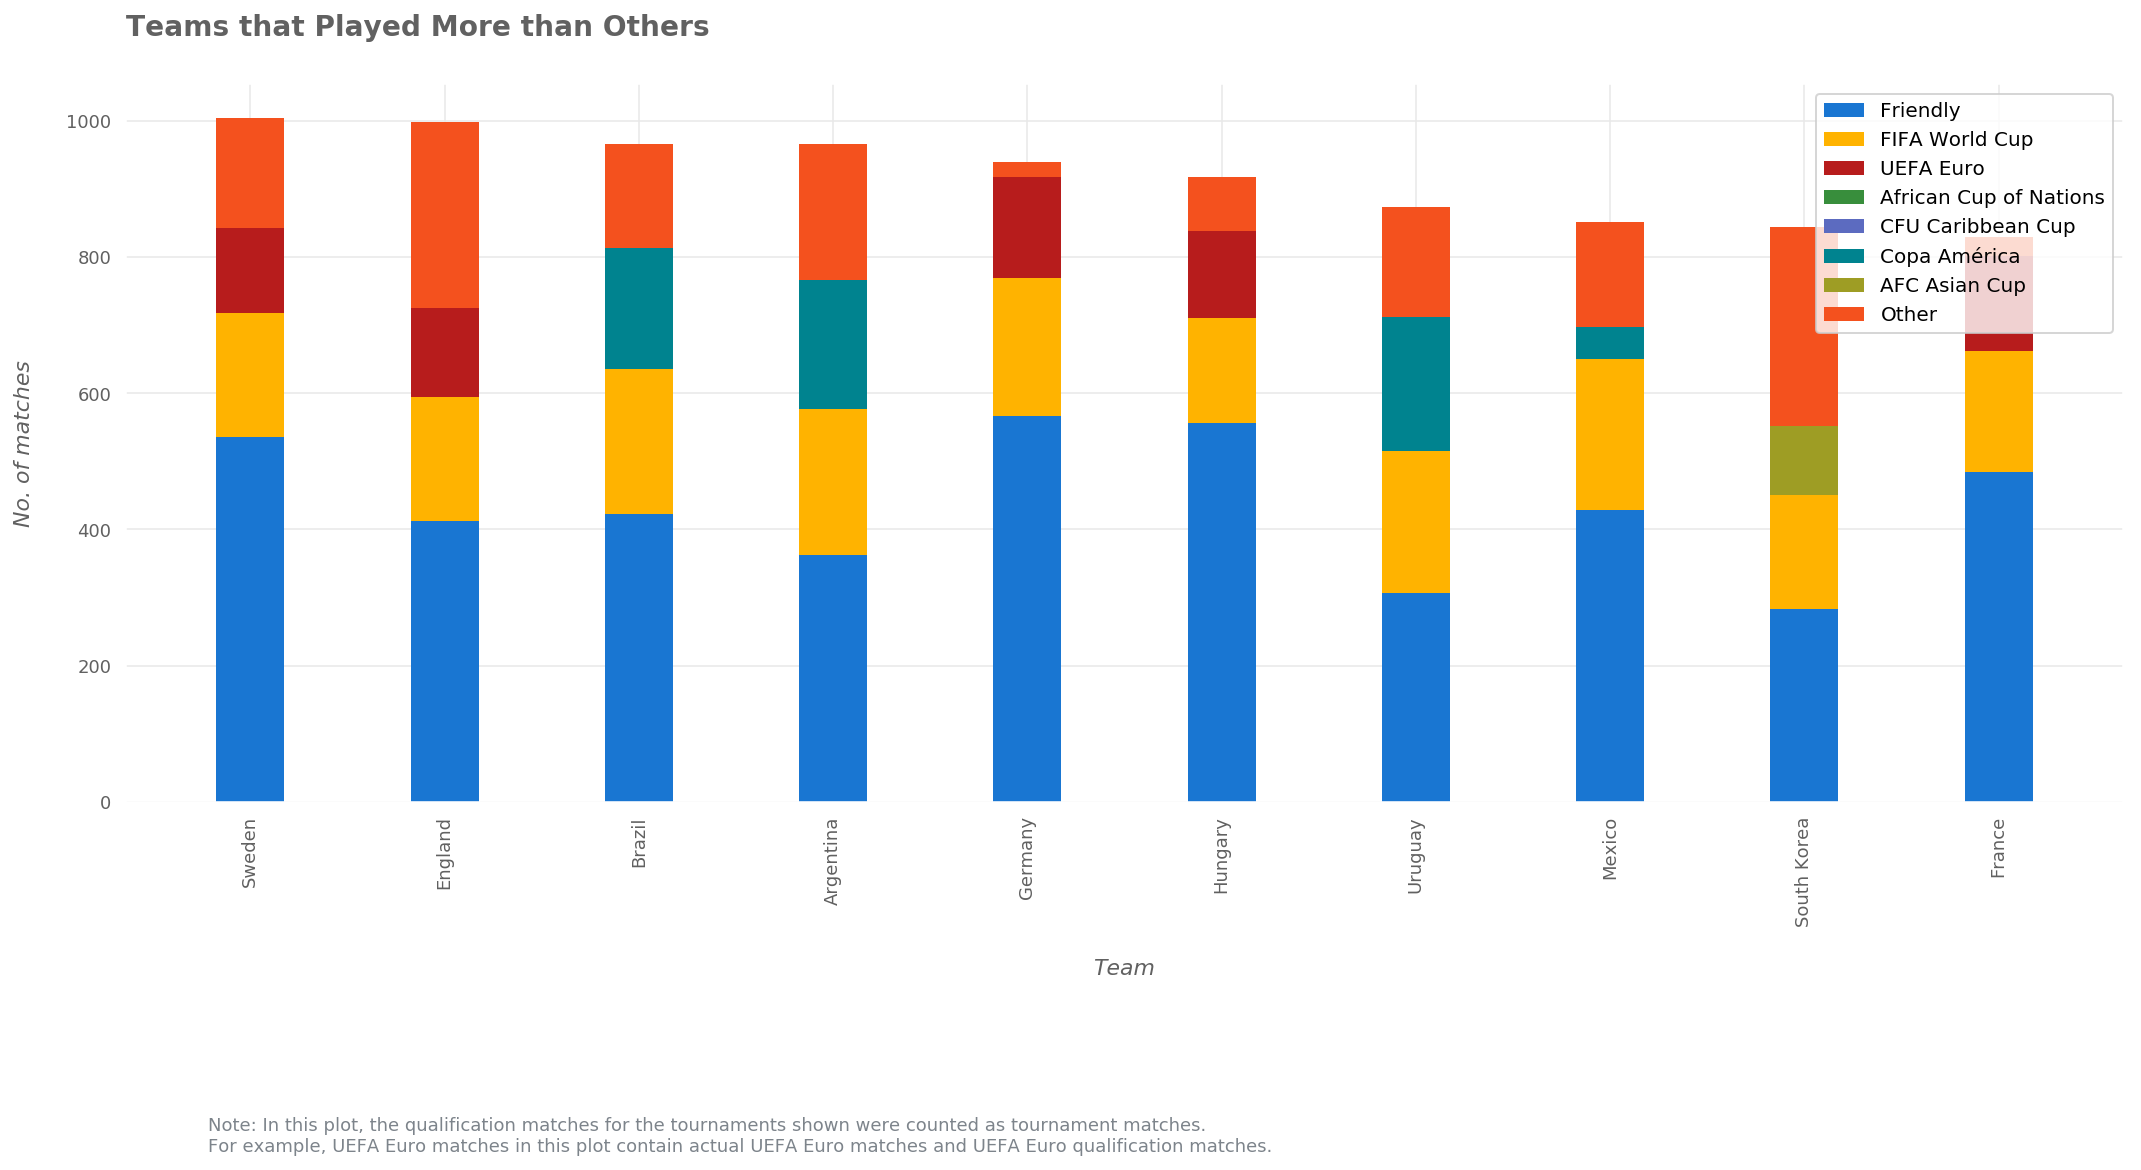

In [25]:
stack_colors = ["#1976d2", "#ffb300", "#b71c1c", "#388e3c", "#5c6bc0", "#00838f", "#9e9d24", "#f4511e", "#8e24aa", "#ad1457"]
num_of_teams = 10
tournaments_of_interest = ['Friendly', 'FIFA World Cup', 'UEFA Euro', 'African Cup of Nations', 'CFU Caribbean Cup', 
                           'Copa América', 'AFC Asian Cup', 'Other']
cdf1 = df[['home_team', 'tournament']].rename(columns={'home_team': 'team'})
cdf2 = df[['away_team', 'tournament']].rename(columns={'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf.replace(to_replace={'FIFA World Cup qualification': 'FIFA World Cup', 'UEFA Euro qualification': 'UEFA Euro',
                        'African Cup of Nations qualification': 'African Cup of Nations', 'AFC Asian Cup qualification':
                        'AFC Asian Cup', 'CFU Caribbean Cup qualification': 'CFU Caribbean Cup'}, 
            value=None, inplace=True)
cdf['count'] = 1
cdf_piv = cdf.pivot_table(values='count', index='team', columns='tournament', aggfunc=np.sum, fill_value=0)
tournament_counts = cdf['tournament'].value_counts(sort=True, ascending=False)
teams = df['home_team'].append(df['away_team'], ignore_index=True)
team_counts = teams.value_counts().sort_values(ascending=False).head(num_of_teams)
s_df = pd.DataFrame(columns=tournaments_of_interest, index=team_counts.index)
for i in range(s_df.shape[0]):
    t = s_df.index[i]
    team_tournament_counts = []
    for col in s_df.columns:
        if col != 'Other':
            team_tournament_counts.append(cdf_piv.loc[t, col])
        else:
            team_tournament_counts.append(team_counts.loc[t] - np.sum(team_tournament_counts))
    s_df.loc[t, :] = team_tournament_counts
ind = np.arange(num_of_teams); b_w = 0.35
fig, ax = plt.subplots(figsize=(15,7));
prev = np.zeros(num_of_teams)
for i, col in enumerate(s_df.columns):
    ax.bar(ind, s_df[col].values.flatten(), width=b_w, bottom=prev, color=stack_colors[i], label=col);
    prev += s_df[col].values.flatten()
ax.set_xticks(ind);
ax.set_xticklabels(s_df.index.values, rotation=90);
plt.legend(loc=1);
plot_conf(ax, xlbl='Team', ylbl='No. of matches', t='Teams that Played More than Others')
plt.figtext(0.1, -0.15, 'Note: In this plot, the qualification matches for the tournaments shown were '
            'counted as tournament matches. \nFor example, UEFA Euro matches in this plot contain actual '
            'UEFA Euro matches and UEFA Euro qualification matches.', wrap=True, horizontalalignment='left', 
            fontsize=9, color='#7d848b');
plt.tight_layout()
plt.savefig('fban-played-more.png', dpi=300)

In [49]:
# exact numbers
display(s_df)
s_df.apply(np.sum, axis=1)

,Friendly,FIFA World Cup,UEFA Euro,African Cup of Nations,CFU Caribbean Cup,Copa América,AFC Asian Cup,Other
Sweden,536,182,124,0,0,0,0,162
England,413,181,131,0,0,0,0,274
Brazil,423,213,0,0,0,178,0,152
Argentina,363,214,0,0,0,189,0,200
Germany,567,203,147,0,0,0,0,22
Hungary,557,153,129,0,0,0,0,79
Uruguay,307,208,0,0,0,197,0,161
Mexico,428,222,0,0,0,48,0,154
South Korea,283,168,0,0,0,0,101,292
France,485,177,140,0,0,0,0,27


Sweden         1004
England         999
Brazil          966
Argentina       966
Germany         939
Hungary         918
Uruguay         873
Mexico          852
South Korea     844
France          829
dtype: int64

As we can see, Sweden team is the one that played the largest number of matches with around 1,000 matches; more than half of Sweden matches are Friendly matches whereas FIFA-World-Cup and UEFA-Euro matches constitute around quarter of Sweden matches. Sweden is followed closely by England and Argentina. 

Now let's plot a bar plot for all teams, not just the top 10 teams. Due to the large number of teams, it is not possible to show team names in the plot; we just want to see how the number of matches differ for different teams.

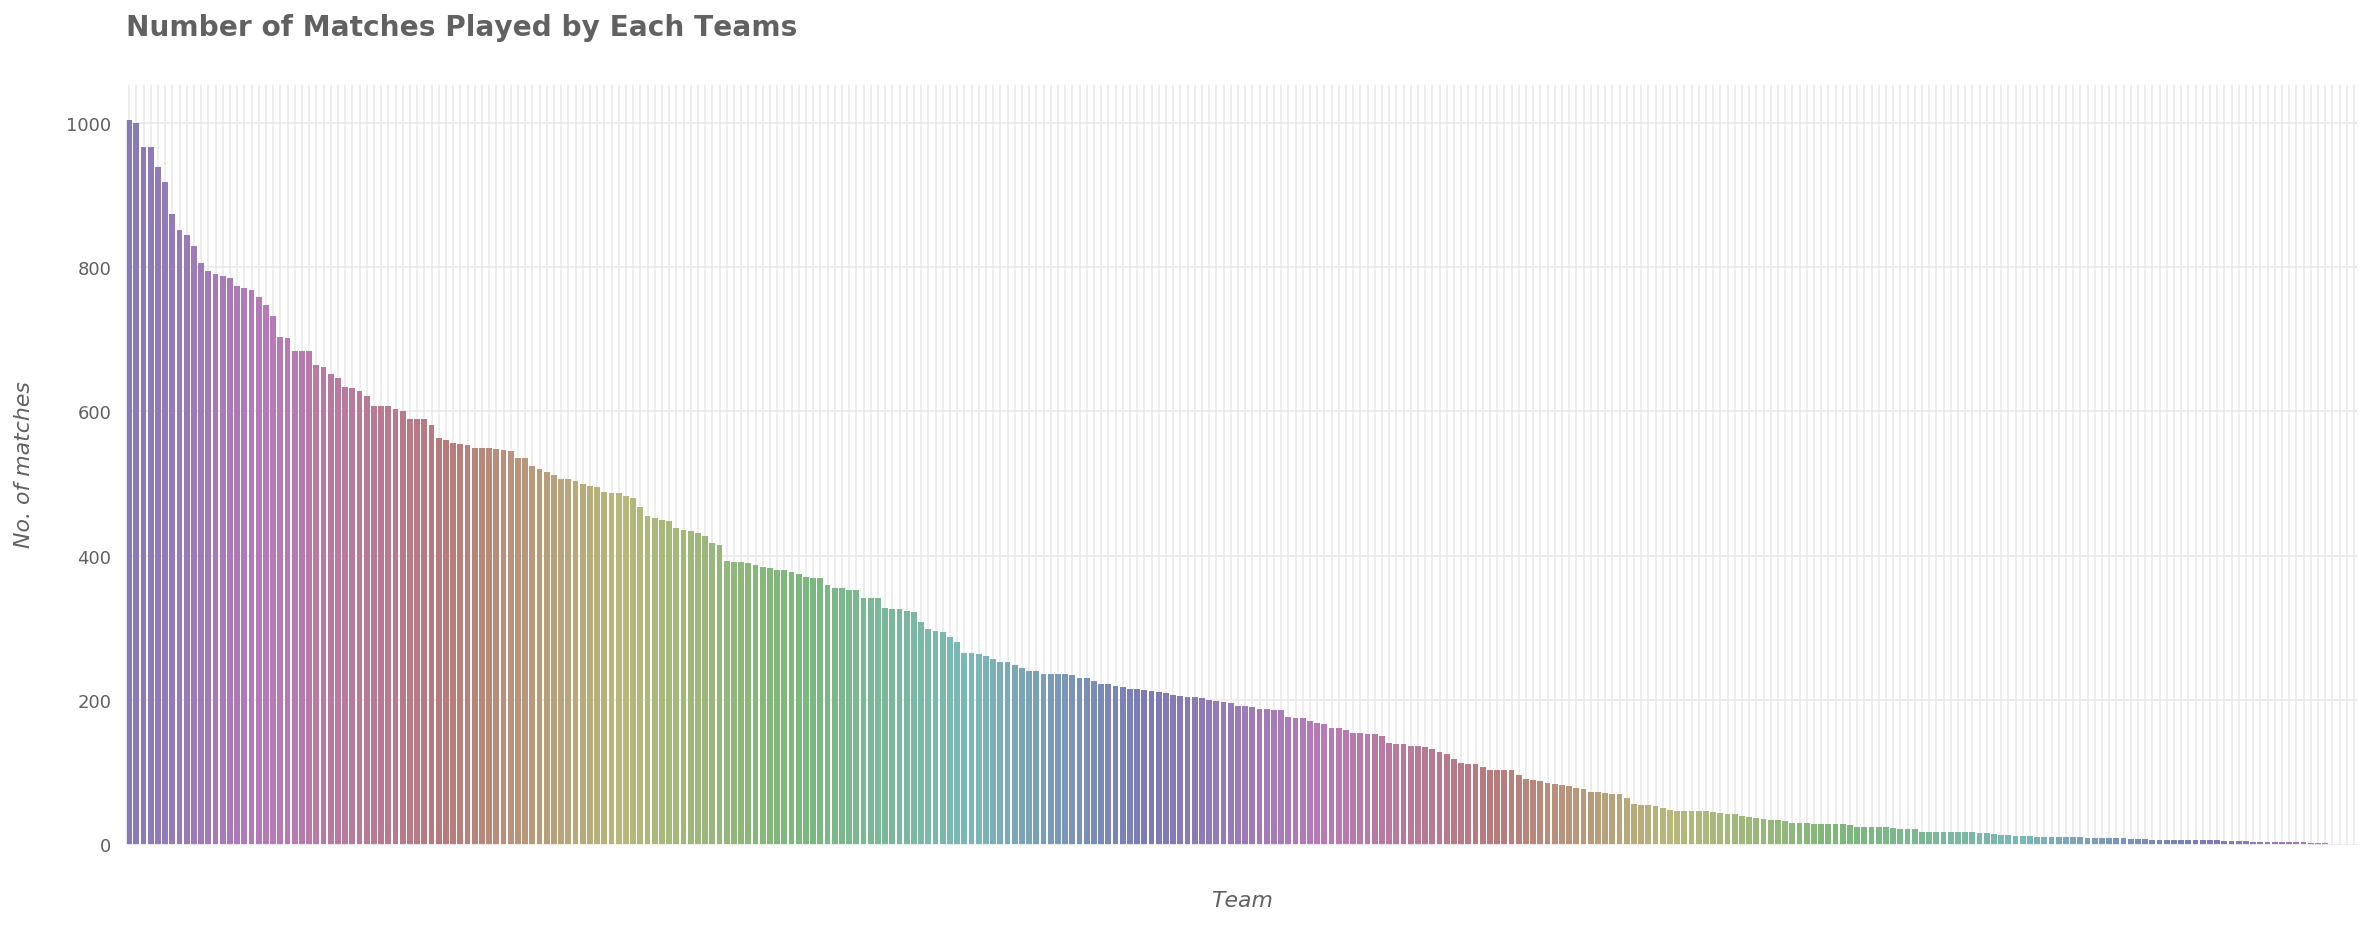

In [26]:
teams = df['home_team'].append(df['away_team'], ignore_index=True)
team_counts = teams.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7));
sns.barplot(x=team_counts.index, y=team_counts.values, ax=ax,
            palette=sns.hls_palette(n_colors=146, s=0.4, l=0.6, h=0.7));
ax.set_xticklabels([]);
plt.tick_params(axis='x', which='both', bottom=False);
plot_conf(ax, xlbl='Team', ylbl='No. of matches', t='Number of Matches Played by Each Teams')

## Which Teams Played More than Others in World Cup?

Germany      109
Brazil       109
Italy         83
Argentina     81
England       69
France        66
Spain         63
Mexico        57
Uruguay       56
Sweden        51
Name: team, dtype: int64

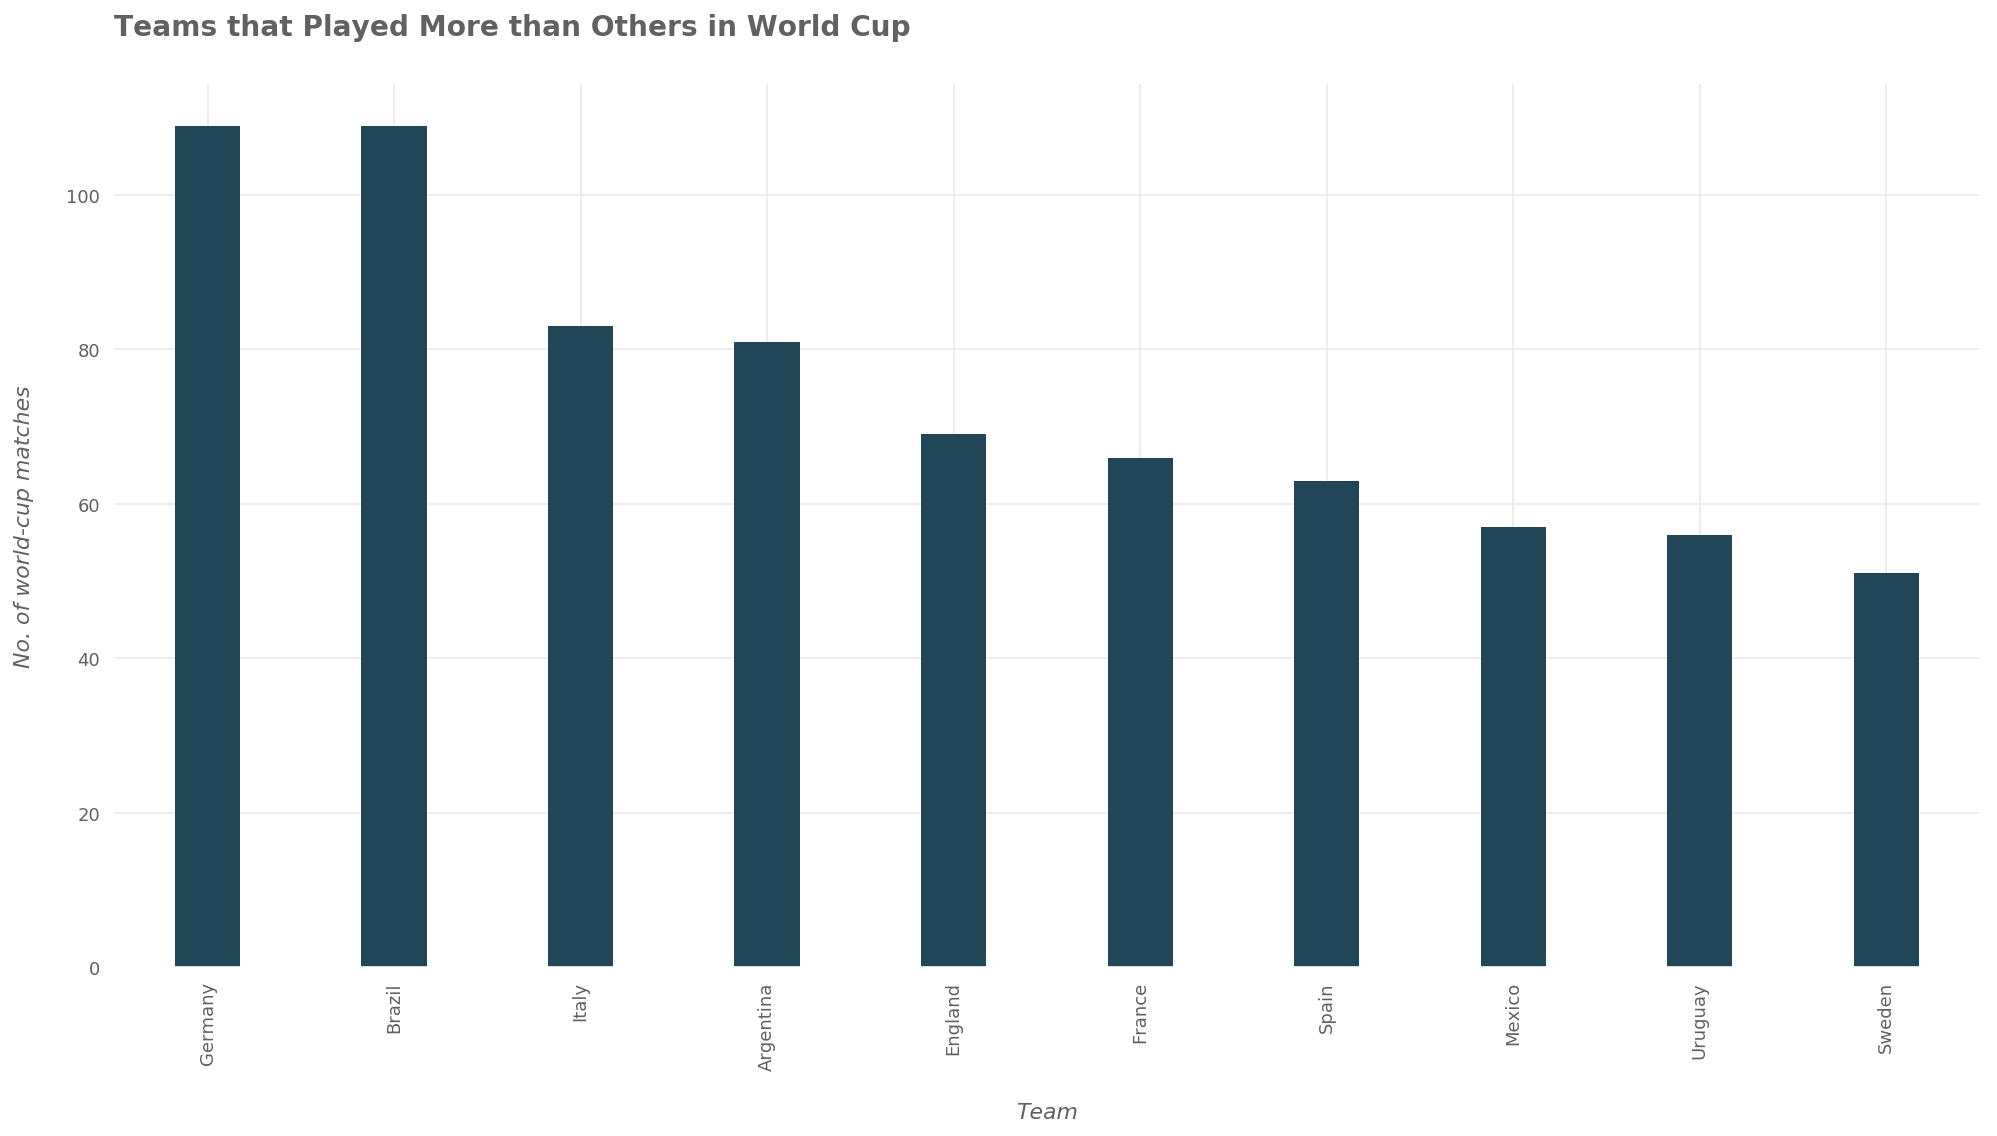

In [51]:
cdf1 = df[df['tournament'] == 'FIFA World Cup'][['home_team']].rename(columns={'home_team': 'team'})
cdf2 = df[df['tournament'] == 'FIFA World Cup'][['away_team']].rename(columns={'away_team': 'team'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
ax = cdf['team'].value_counts().head(10).plot(kind='bar', figsize=(14,8), color='#214658');
plot_conf(ax, xlbl='Team', ylbl='No. of world-cup matches', t='Teams that Played More than Others in World Cup');
display(cdf['team'].value_counts().head(10))
change_width(ax, .35)
plt.tight_layout()
plt.savefig('fban-played-more-wc.png', dpi=300)

# Which Team Won the Largest Number of Matches?
In order to know which team won the largest number of matches, let's create two new columns: a column that shows the result of the match (home_win, away_win, or draw), and another column that shows the name of the winning team or 'draw' in case of draw:

## Creating result and winner Variables

In [28]:
# Adding the result column
def get_match_result(scores):
    if scores['home_score'] > scores['away_score']:
        return 'home_win'
    elif scores['home_score'] == scores['away_score']:
        return 'draw'
    else:
        return 'away_win'

df['result'] = df[['home_score', 'away_score']].apply(get_match_result, axis=1)

# Adding the winning team column
def get_winning_team(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['home_team']
    else:
        return s['away_team']
        
df['winner'] = df[['home_team', 'away_team', 'result']].apply(get_winning_team, axis=1)

Now, let's see the teams that won most matches throughout history. We will take a look at the top 30 teams:

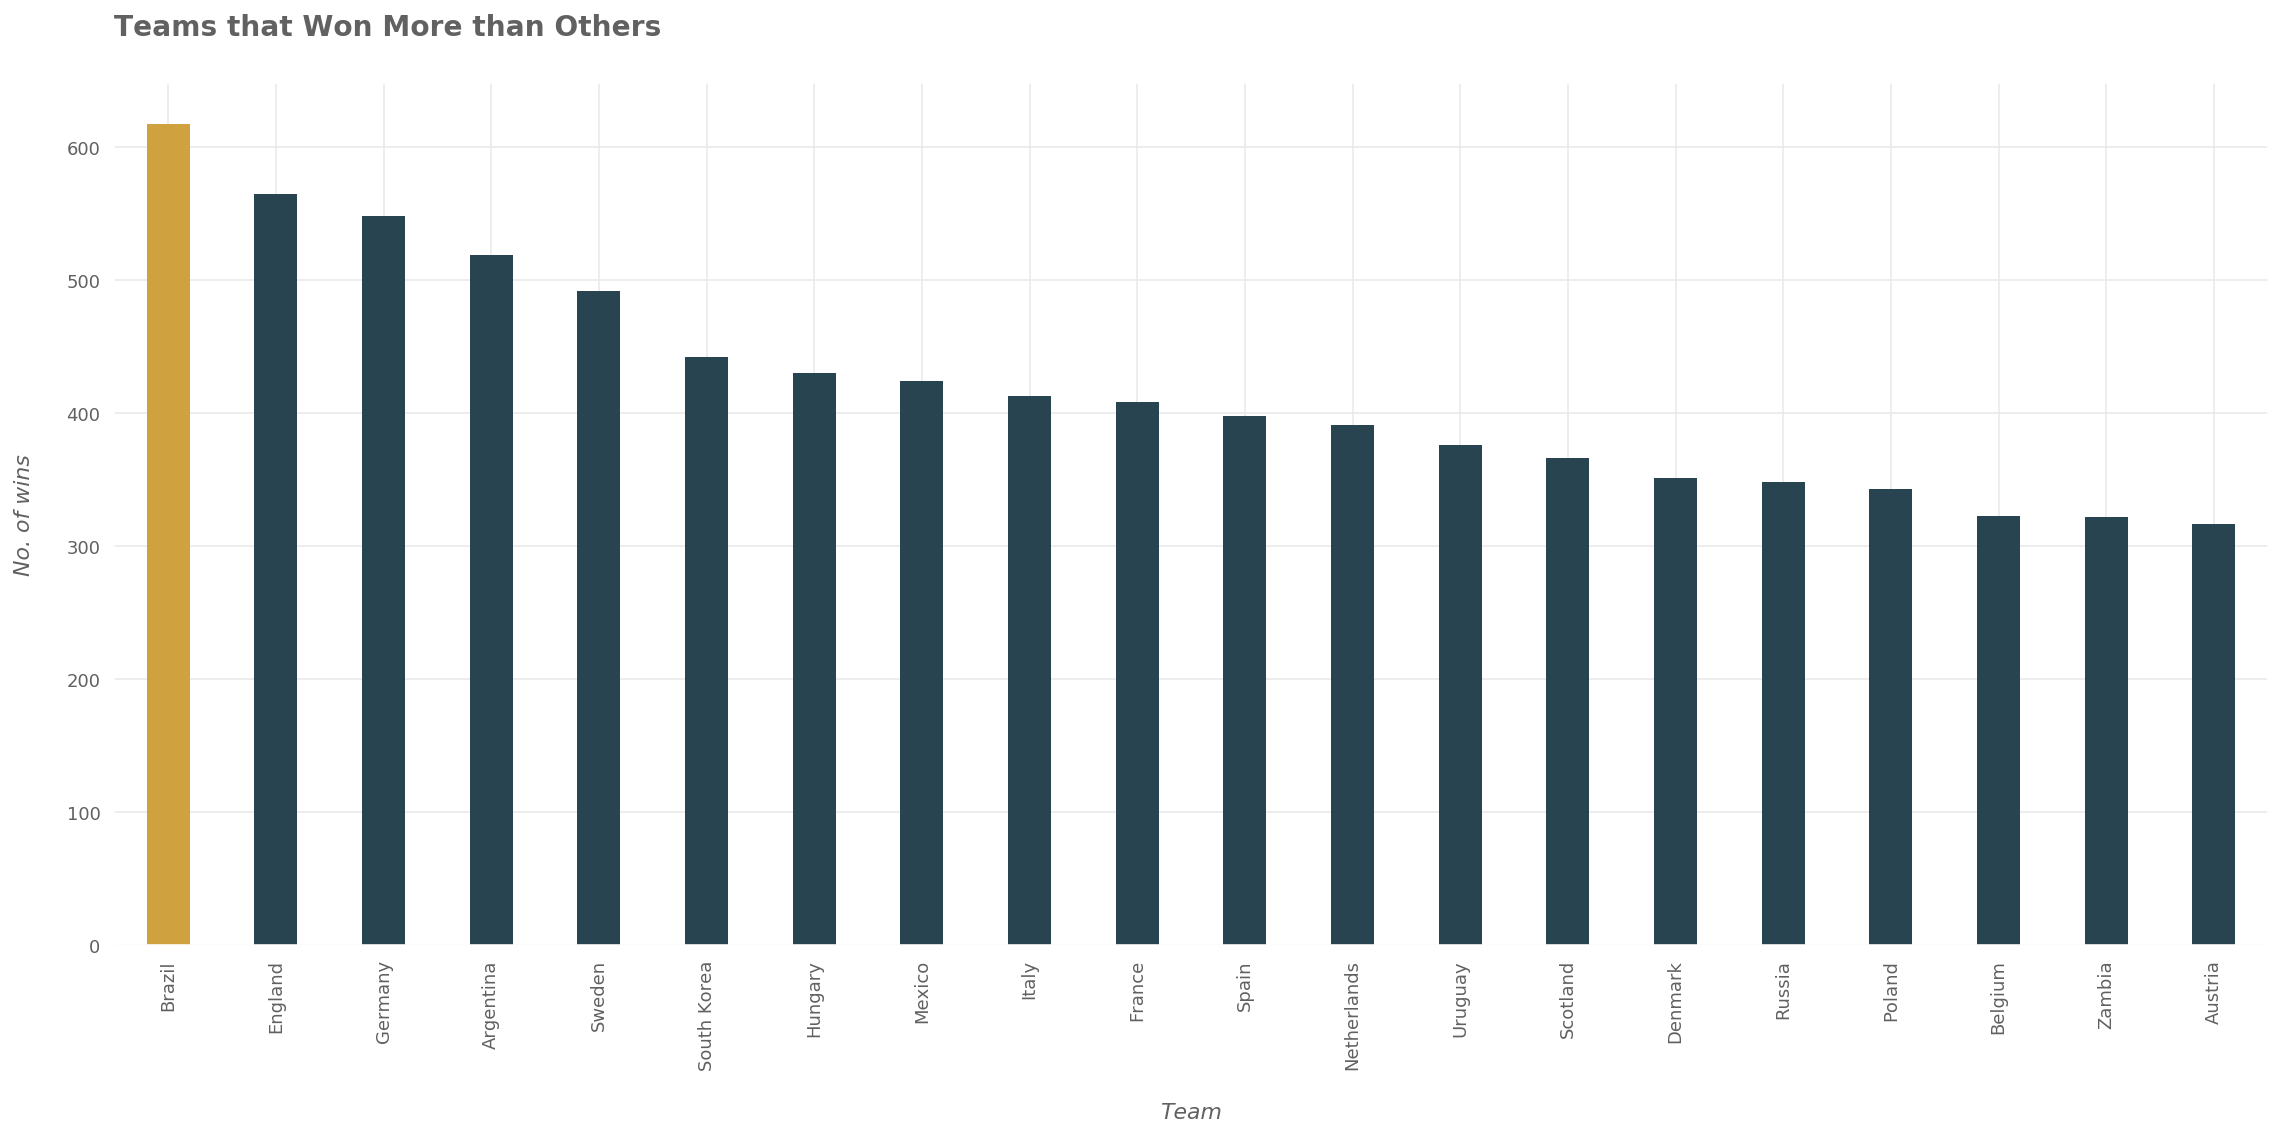

In [52]:
# We don't need matches that ended with draw
cdf = df[df.winner != 'draw']
winner_counts = cdf.winner.value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(16,8));
sns.barplot(x=[winner_counts.index[0]], y=[winner_counts.values[0]], ax=ax, color='#e7aa27');
sns.barplot(x=winner_counts.index, y=np.concatenate(([0], winner_counts.values[1:]), axis=None), ax=ax, color='#214658');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plot_conf(ax, xlbl='Team', ylbl='No. of wins', t='Teams that Won More than Others')
change_width(ax, .4)
plt.tight_layout()
plt.savefig('fban-won-more.png', dpi=300)

In [54]:
winner_counts

Brazil         617
England        565
Germany        548
Argentina      519
Sweden         492
South Korea    442
Hungary        430
Mexico         424
Italy          413
France         408
Spain          398
Netherlands    391
Uruguay        376
Scotland       366
Denmark        351
Russia         348
Poland         343
Belgium        323
Zambia         322
Austria        317
Name: winner, dtype: int64

We see that Brazil comes first as expected with ~600 wins, followed by England with ~550 wins, then Germany, then Argentina.

# Which Team Lost the Largest Number of Matches?
Now, let's look at the other side of the game; let's find the team that lost matches more than others.

## Creating loser Variable
As we did for the `winner` variable, we will perform similar steps to create a `loser` variable:

In [30]:
# Adding the loser team column
def get_loser_team(s):
    if s['result'] == 'draw':
        return 'draw'
    elif s['result'] == 'home_win':
        return s['away_team']
    else:
        return s['home_team']
        
df['loser'] = df[['home_team', 'away_team', 'result']].apply(get_loser_team, axis=1)

Now, let's see the teams that lost most matches throughout history:

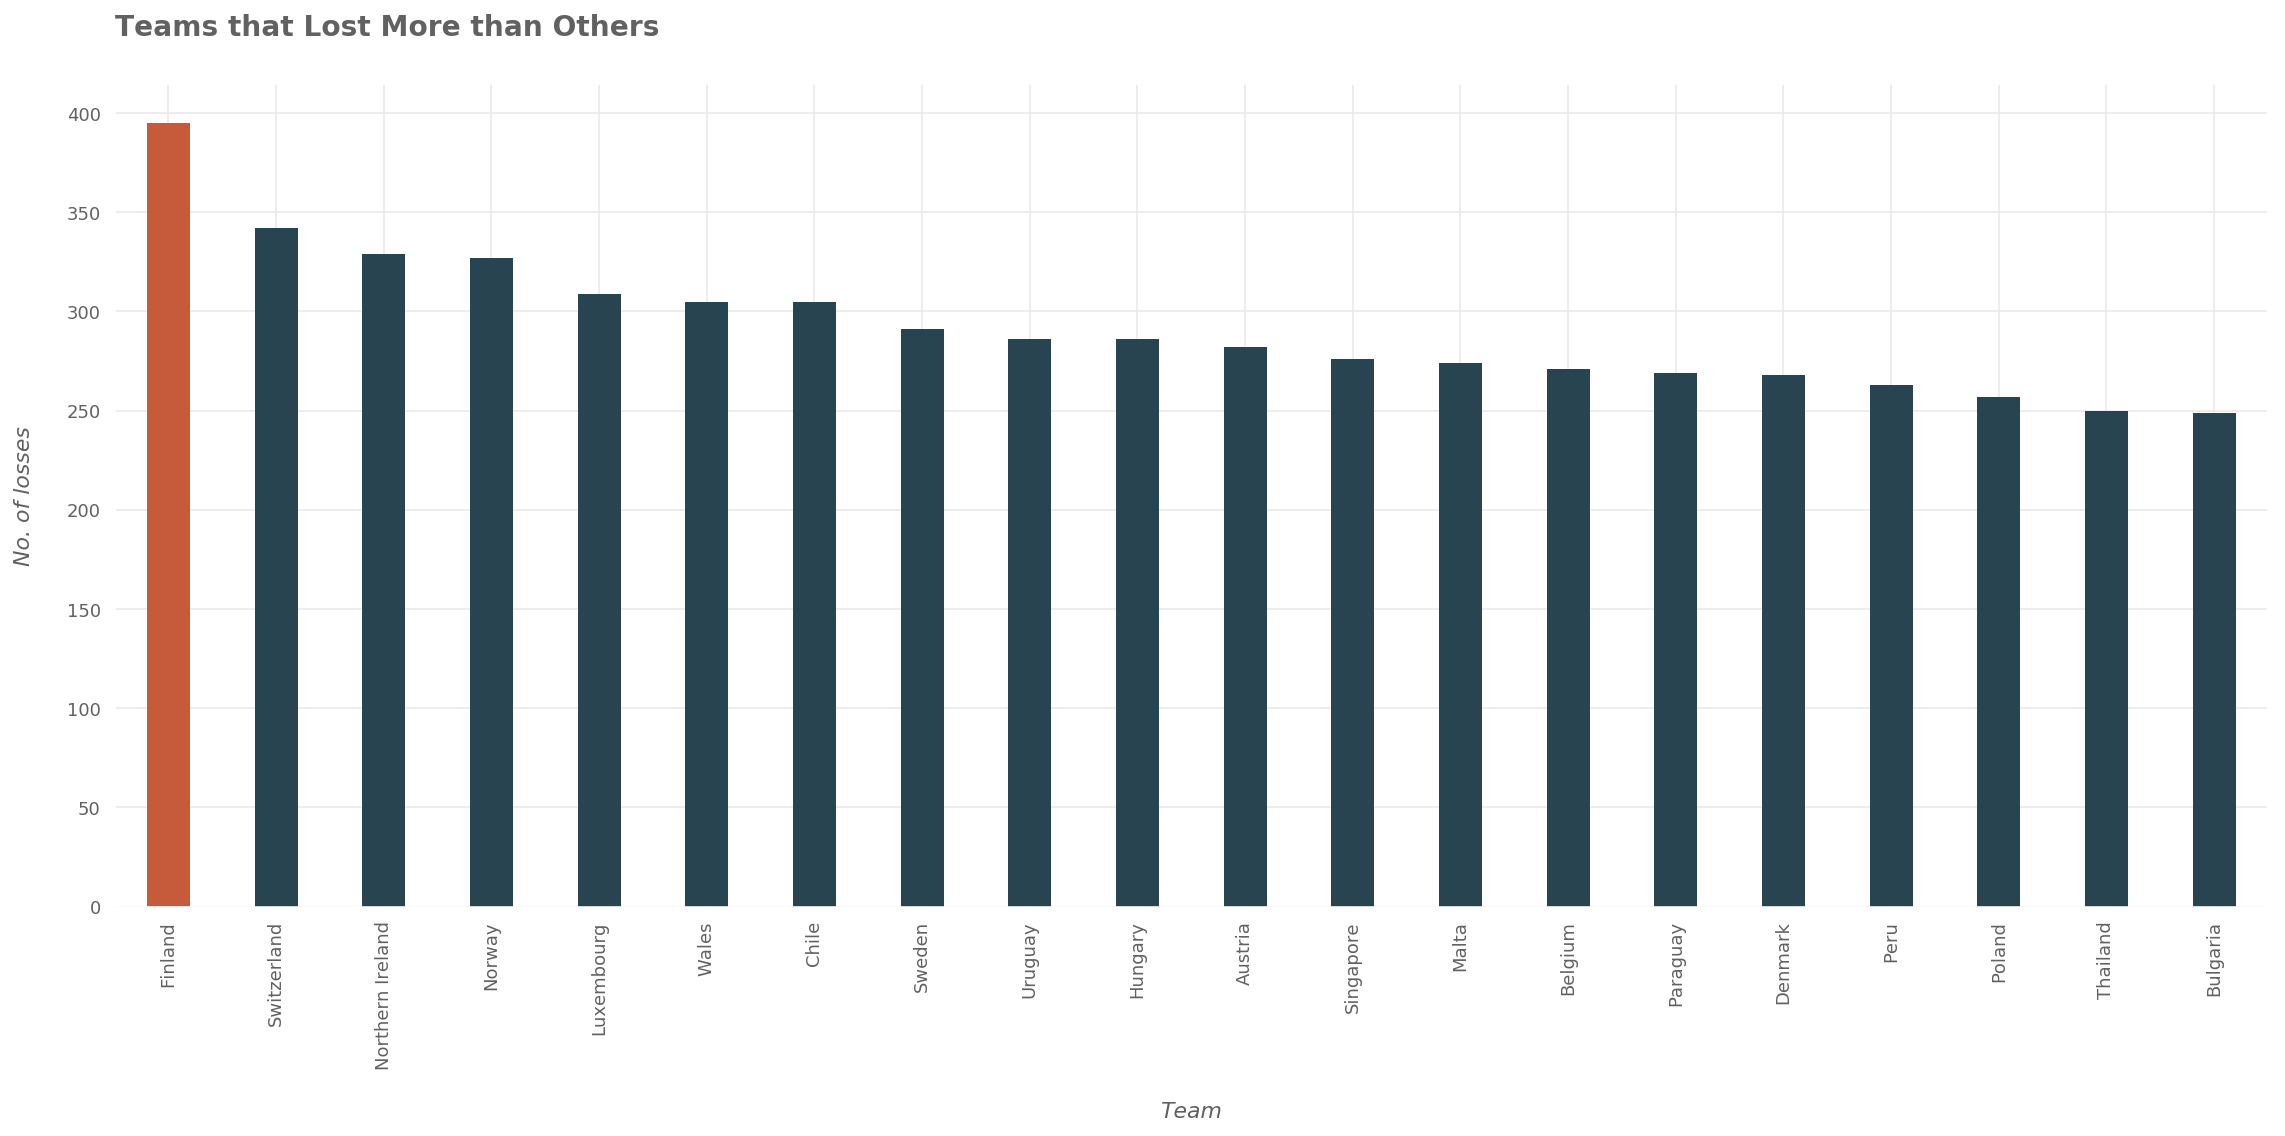

In [31]:
# We don't need matches that ended with draw
cdf = df[df.loser != 'draw']
loser_counts = cdf.loser.value_counts().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(16,8));
sns.barplot(x=[loser_counts.index[0]], y=[loser_counts.values[0]], ax=ax, color='#dc4e24');
sns.barplot(x=loser_counts.index, y=np.concatenate(([0], loser_counts.values[1:]), axis=None), ax=ax, color='#214658');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plot_conf(ax, xlbl='Team', ylbl='No. of losses', t='Teams that Lost More than Others')
change_width(ax, .4)
plt.tight_layout()
plt.savefig('fban-lost-more.png', dpi=300)

In [56]:
loser_counts.head()

Finland             395
Switzerland         342
Northern Ireland    329
Norway              327
Luxembourg          309
Name: loser, dtype: int64

We can see that Finland is the team that lost the largest number of matches (~380 matches), followed by Switzerland with ~330 matches, followed by Norway.

# Wins - Losses
I think that a more interesting analysis can be done by subtracting the number of losses from the number of wins for each team. This will show us teams that won more than they lost and teams that lost more than won. It will also allow us to see which teams are better: teams with larger subtraction results—**teams that played more and won more** than others. 

> Note: If we are interested in knowing only which teams won more than they lost, we should divide rather than subtract, but this would give us unheard-of teams as best teams: teams that played *very few matches* and won almost all of them would come before teams that played orders-of-magnitude more matches but with smaller ratio between won and lost matches.

So after we apply the following equation for each team:

$$\text{Wins - Losses  =  Number of wins - Number of losses}$$

we plot the results for the 50 teams with the largest *absolute* results

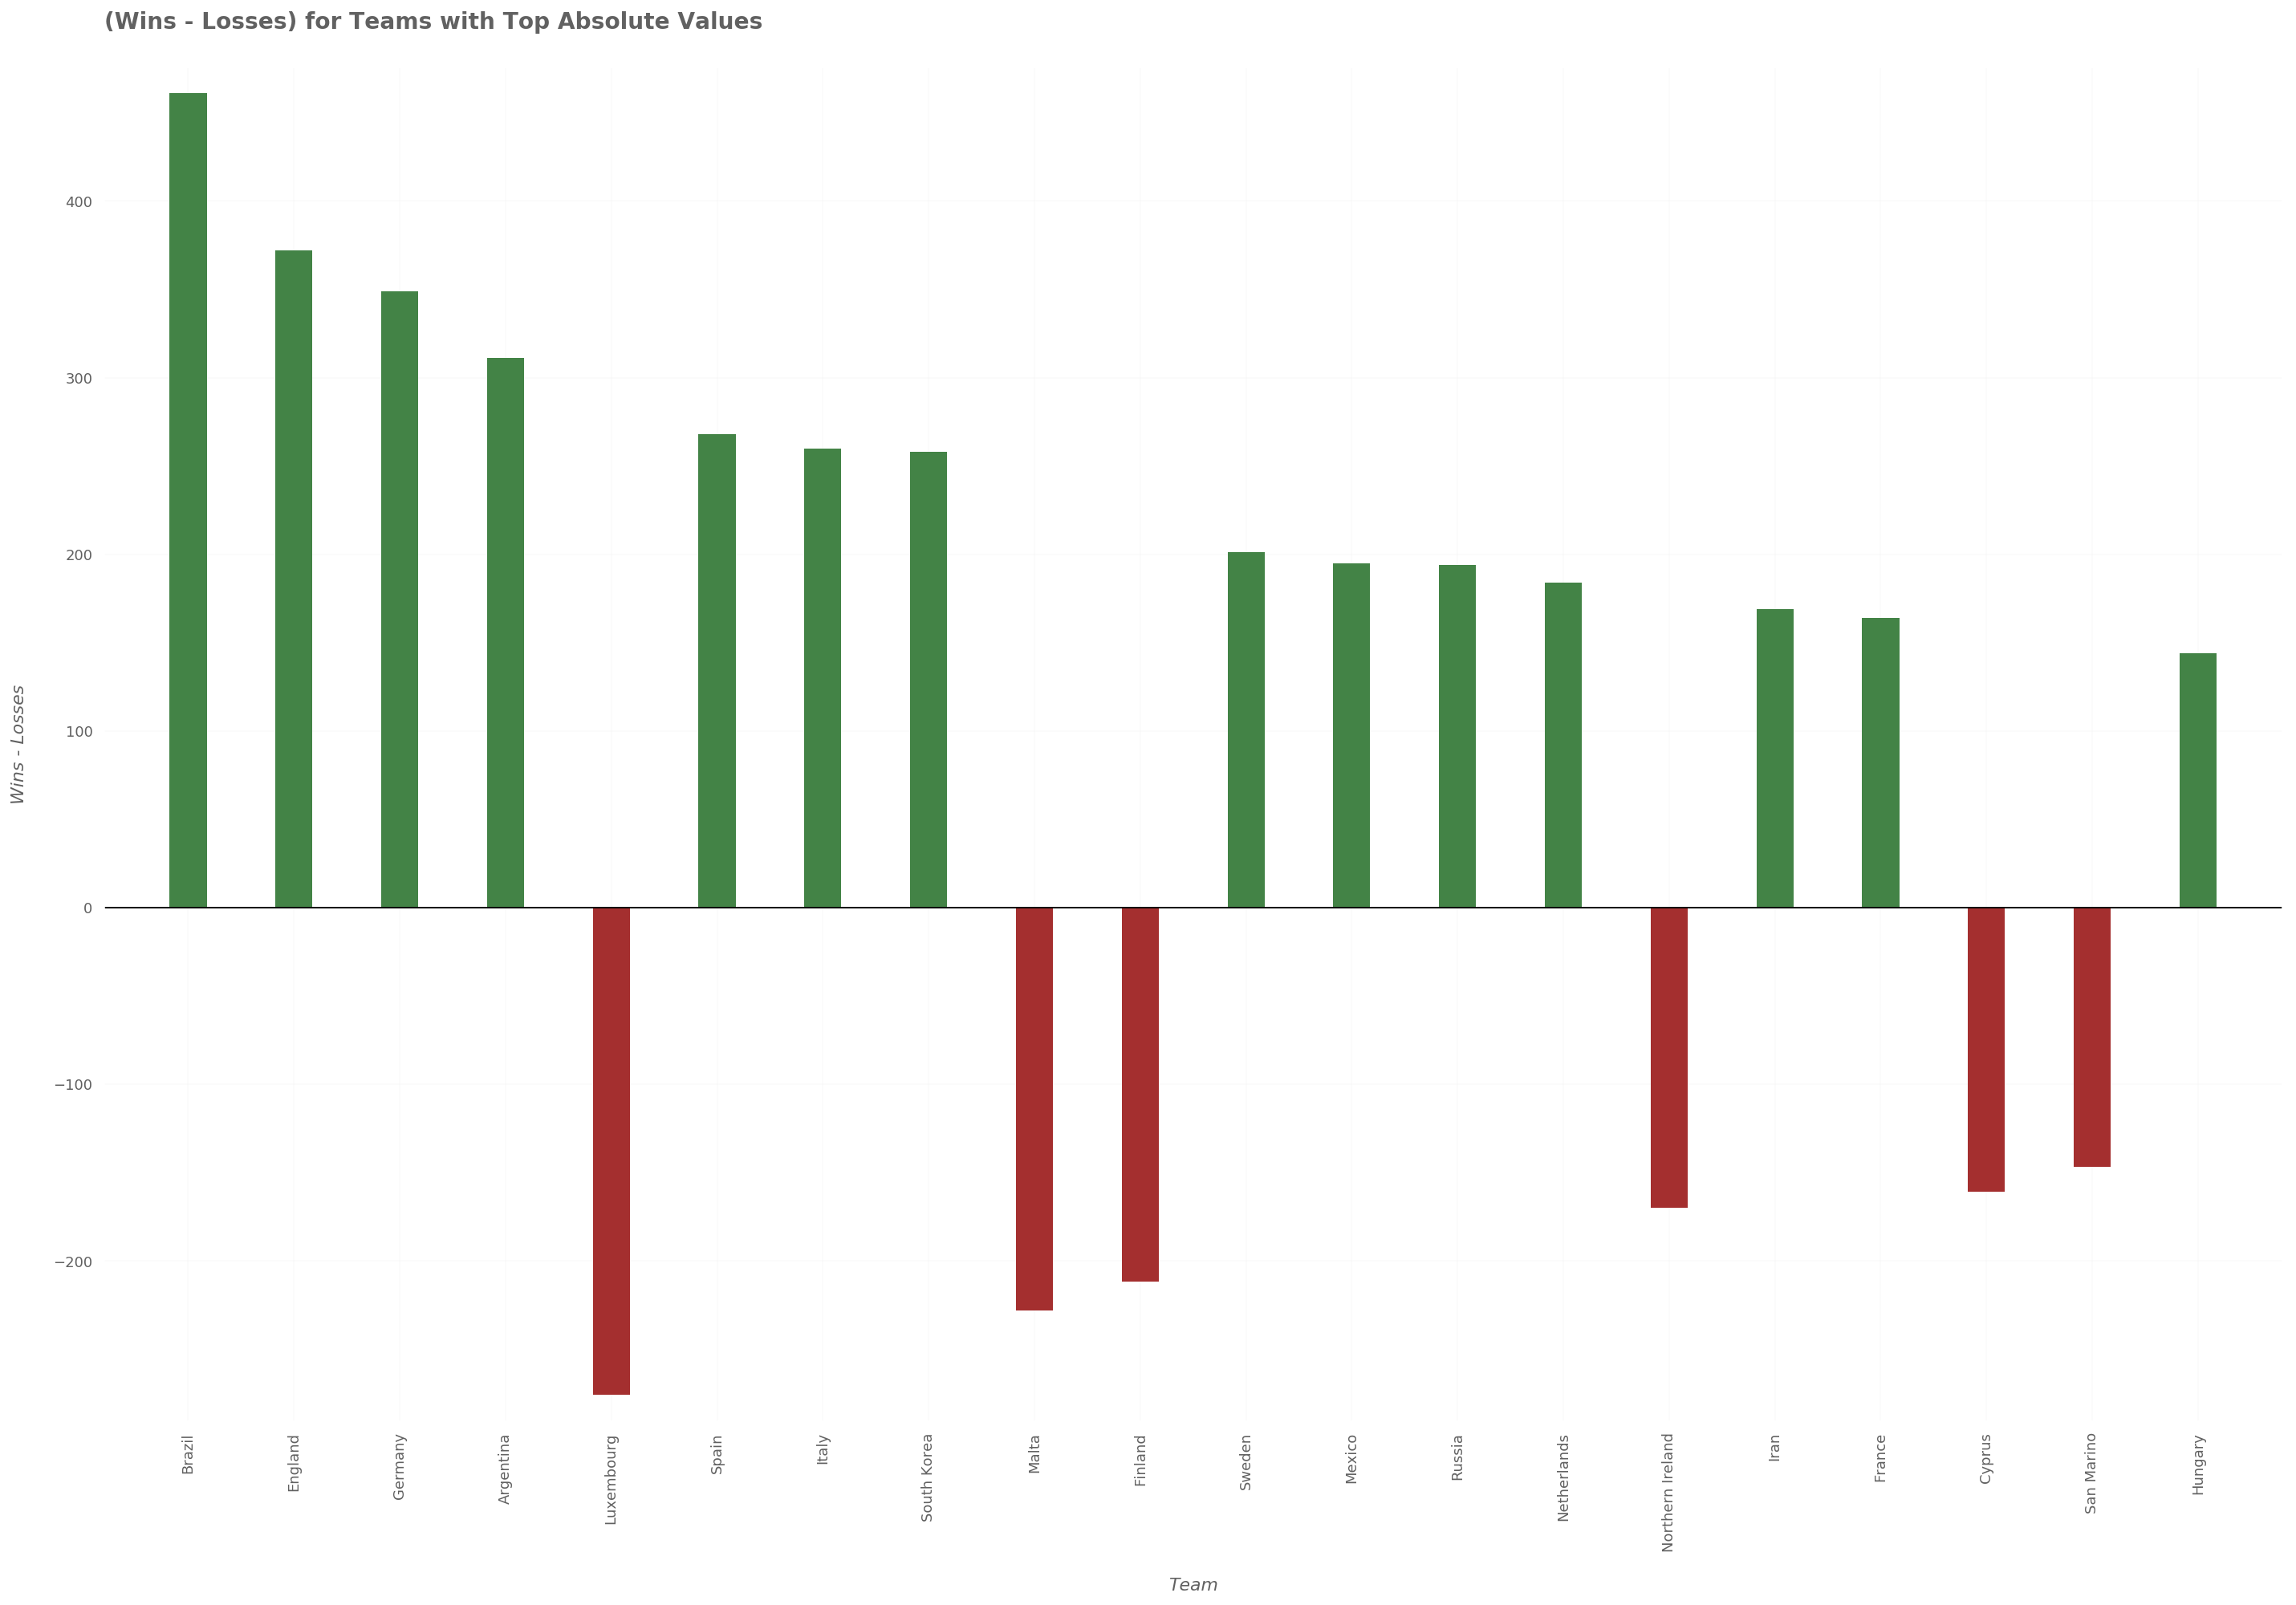

In [58]:
cdf = df[df.winner != 'draw']
winner_counts = cdf.winner.value_counts().sort_values(ascending=False)
loser_counts = cdf.loser.value_counts().sort_values(ascending=False)
teams = set(winner_counts.index.values.tolist() + loser_counts.index.values.tolist())
wins_minus_losses = pd.Series()
for team in teams:
    wins_minus_losses[team] = winner_counts.get(team, 0) - loser_counts.get(team, 0)

wins_minus_losses = wins_minus_losses.reindex(wins_minus_losses.abs().sort_values(ascending=False).index).head(20)
pos = wins_minus_losses[wins_minus_losses >= 0]
pos = [(i, v) if v >= 0 else (i, 0) for i,v in zip(wins_minus_losses.index, wins_minus_losses.values)]
pos = pd.Series(dict(pos))
neg = wins_minus_losses[wins_minus_losses < 0]
neg = [(i, v) if v < 0 else (i, 0) for i,v in zip(wins_minus_losses.index, wins_minus_losses.values)]
neg = pd.Series(dict(neg))
fig, ax = plt.subplots(figsize=(20,14));
sns.barplot(x=pos.index, y=pos.values, color='#388e3c', ax=ax);
sns.barplot(x=neg.index, y=neg.values, color='#b71c1c', ax=ax);
# sns.barplot(x=wins_minus_losses.index, y=wins_minus_losses.values, color='tab:blue', ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(y=0, color='black', linewidth=1);
ax.margins(0.02);
ax.grid(True, alpha=0.2);
plot_conf(ax, xlbl='Team', ylbl='Wins - Losses', t='(Wins - Losses) for Teams with Top Absolute Values')
change_width(ax, .35)
plt.tight_layout()
plt.savefig('fban-wins-losses.png', dpi=300)

In [60]:
pos.head()

Brazil        461
England       372
Germany       349
Argentina     311
Luxembourg      0
dtype: int64

In [62]:
neg.head(10)

Brazil           0
England          0
Germany          0
Argentina        0
Luxembourg    -276
Spain            0
Italy            0
South Korea      0
Malta         -228
Finland       -212
dtype: int64

We can see that Brazil is the best: the subtraction of Brazil losses from its wins resulted in ~450 “net wins”. After Brazil comes England with ~365 net wins, then Germany with ~350, then Argentina with ~310. After that, we see a negative result: Luxembourg has a negative value when we subtract its losses from its wins which means that Luxembourg lost more matches than it won.

# Percentage of Matches that Ended in a Draw
Let's discover the proportion of matches that ended with a draw compared to matches that ended with the win of one of the teams

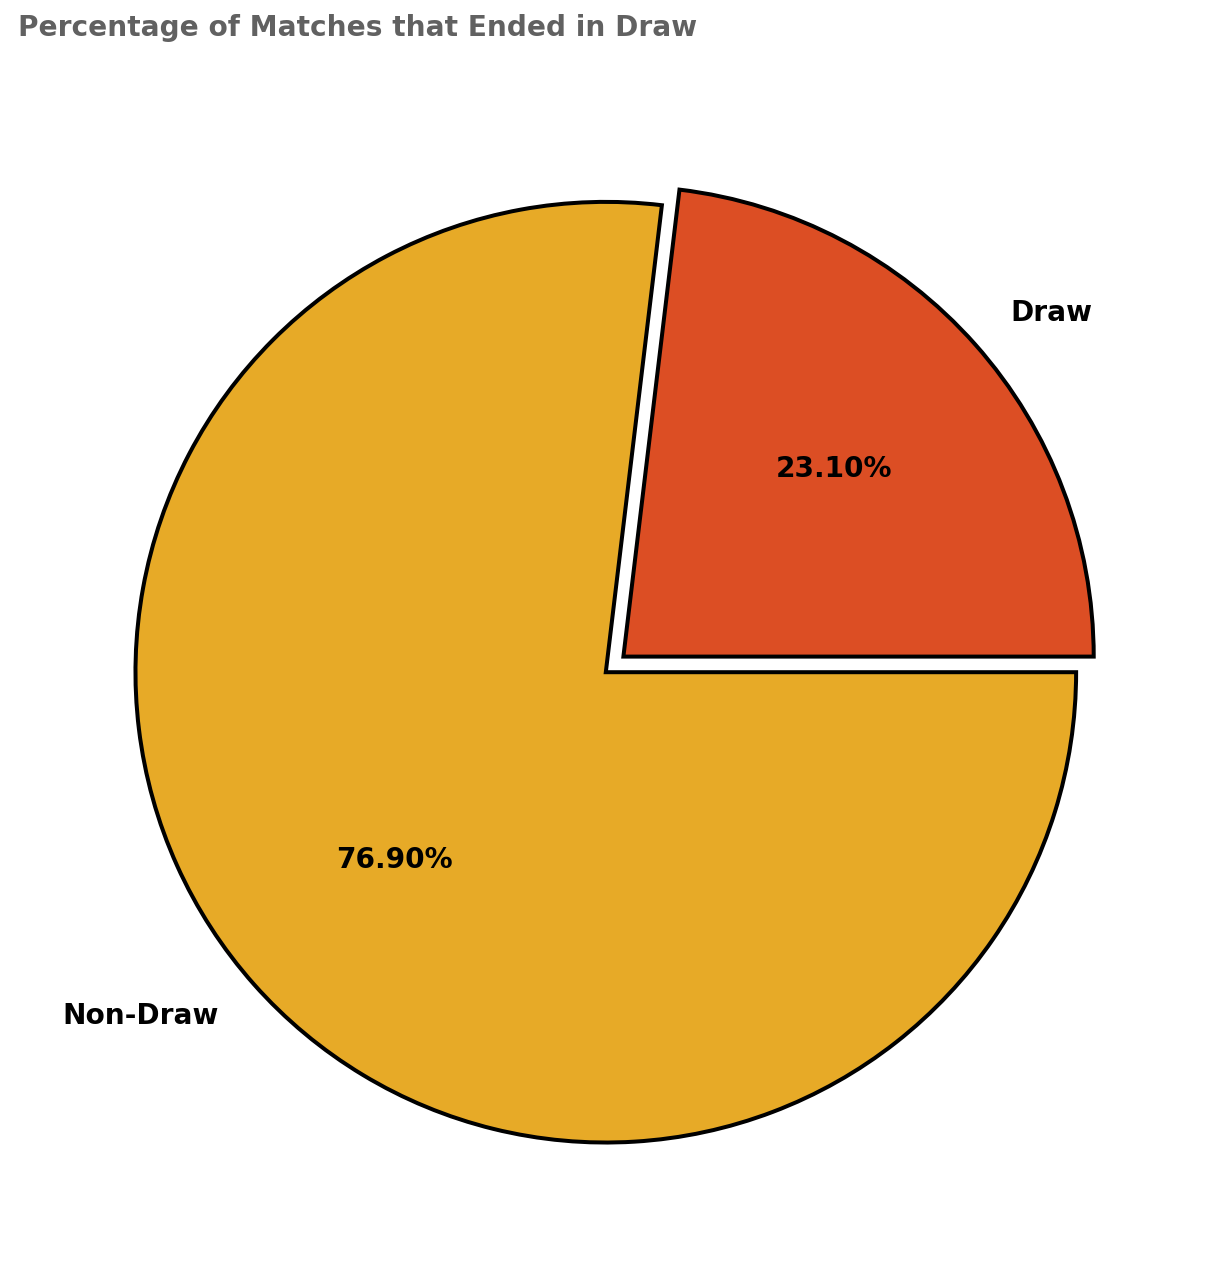

In [33]:
draw_perc = df[df.result == 'draw'].shape[0] / df.shape[0]
fig, ax = plt.subplots(figsize=(14, 9))
ax.pie([draw_perc, 1-draw_perc], explode=[0.05, 0], labels=['Draw', 'Non-Draw'], autopct='%.2f%%', 
       colors=['#dc4e24', '#e7aa27'], textprops={'fontsize':14, 'fontweight':'bold'}, 
       wedgeprops={'linewidth': 2, 'edgecolor': 'black'});
ax.set_aspect(1);
plot_conf(ax, xlbl='', ylbl='', t='Percentage of Matches that Ended in Draw')
plt.tight_layout()
plt.savefig('fban-draw-p.png', dpi=300)

# Which Match Had the Largest Numnber of Goals?

## Creating total_goals Variable
Let's create a new variable to show the total number of goals scored in a match

In [34]:
df['total_goals'] = df['home_score'] + df['away_score']

Now let's see the match with the largest number of goals

In [35]:
df[df['total_goals'] == df['total_goals'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,day_of_the_week,result,winner,loser,total_goals
23788,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,04,11,Wednesday,home_win,Australia,American Samoa,31


Oh! 31 goals. What a match!

So as we can see, Australia defeated American Samoa 31-0 in FIFA World Cup qualifications. The match took place in 2001 which means that it was a qualification match for FIFA World Cup 2002. You can see the [Wikipedia page](https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa) about this world-record match and you can watch a video summary of the match in [this YouTube video](https://www.youtube.com/watch?v=1wg9ox9F7Vw).

# Number of Goals per Year

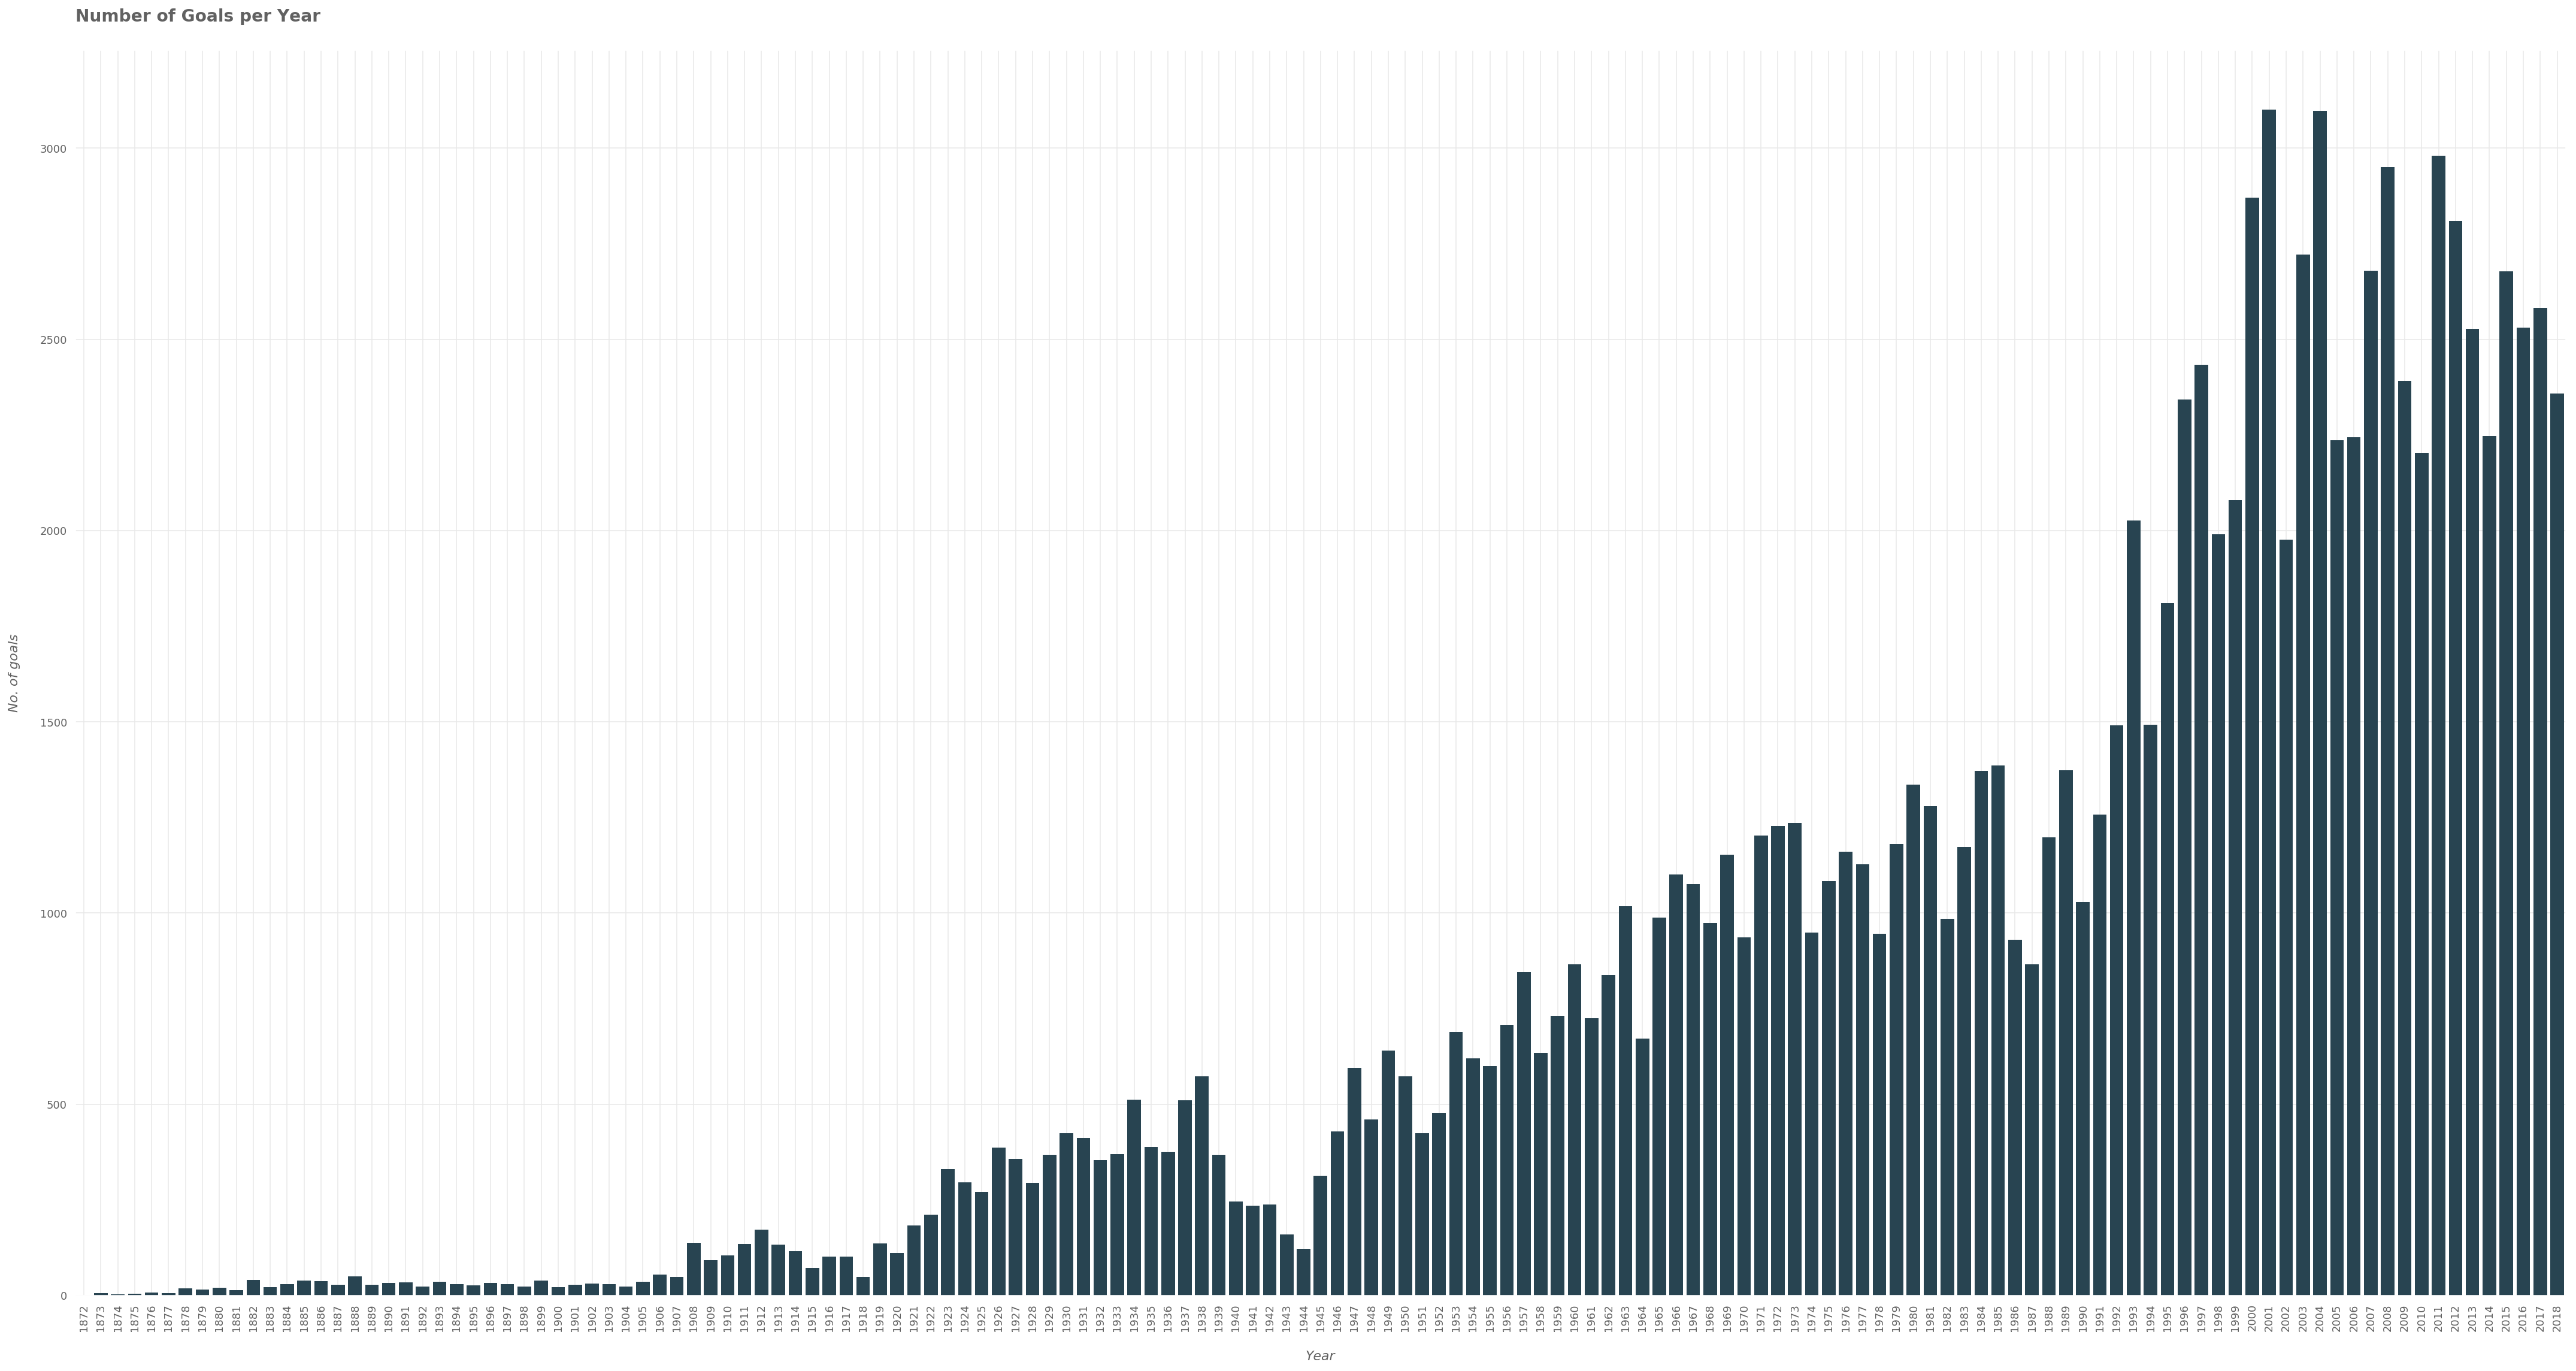

In [191]:
year_goals = df.groupby('year')['total_goals'].sum()
# use a bar plot to show the distribution
fig, ax = plt.subplots(figsize=(30,16));
sns.barplot(x=year_goals.index, y=year_goals, ax=ax, color='#214658', linewidth=0);
# ax = year_counts.plot(kind='barh', figsize=(15,30))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plot_conf(ax, xlbl='Year', ylbl='No. of goals', t='Number of Goals per Year')
plt.tight_layout()
plt.savefig('fban-years-goals.png', dpi=300)

Here is a plot that shows the number of matches per year and the number of goals per year on the same graph to allow inspecting the relationship between the two.

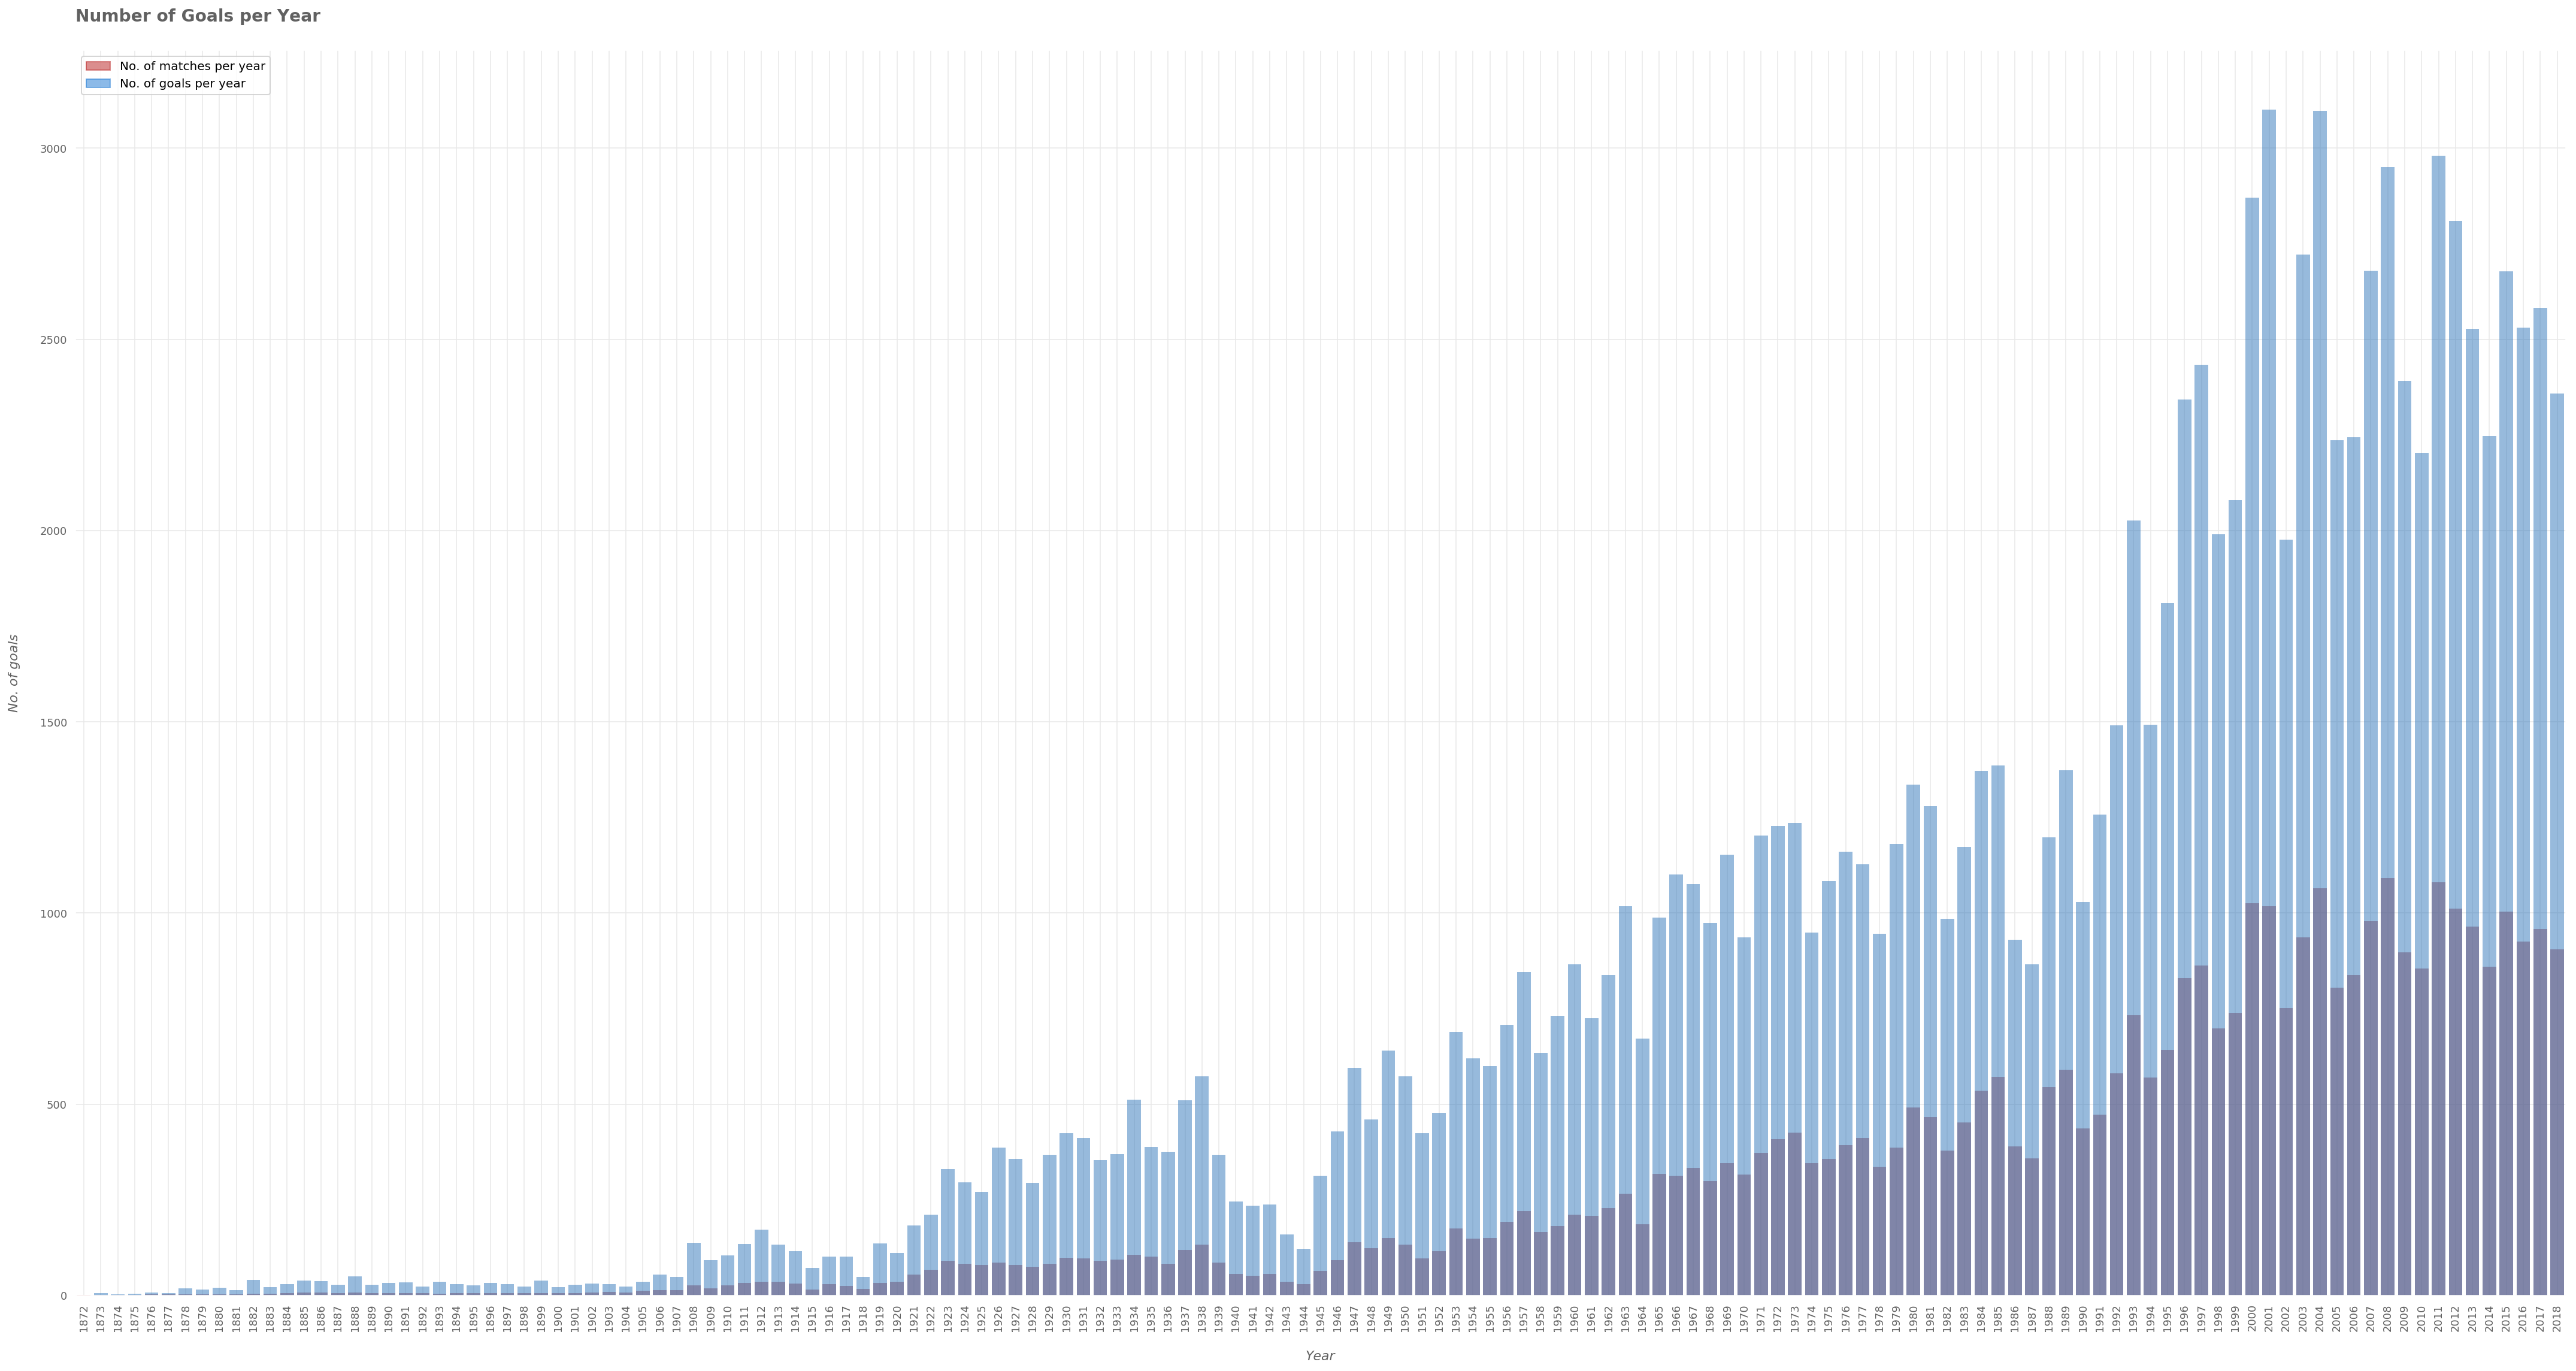

In [193]:
year_counts = df['year'].value_counts()
fig, ax = plt.subplots(figsize=(30,16));
sns.barplot(x=year_counts.index, y=year_counts, ax=ax, color='#b71c1c', linewidth=0, alpha=0.5);

year_goals = df.groupby('year')['total_goals'].sum()
sns.barplot(x=year_goals.index, y=year_goals, ax=ax, color='#1976d2', linewidth=0, alpha=0.5);

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plot_conf(ax, xlbl='Year', ylbl='No. of goals', t='Number of Goals per Year')
m_patch = patches.Patch(color='#b71c1c7f', label='No. of matches per year')
g_patch = patches.Patch(color='#1976d27f', label='No. of goals per year')
plt.legend(handles=[m_patch, g_patch], loc='upper left')
plt.tight_layout()
plt.savefig('fban-years-count-goals.png', dpi=300)

# Which Team Scored the Largest Number of Goals Throughout History?

,score
team,
England,2170
Brazil,2116
Germany,2091
Sweden,1988
Hungary,1876


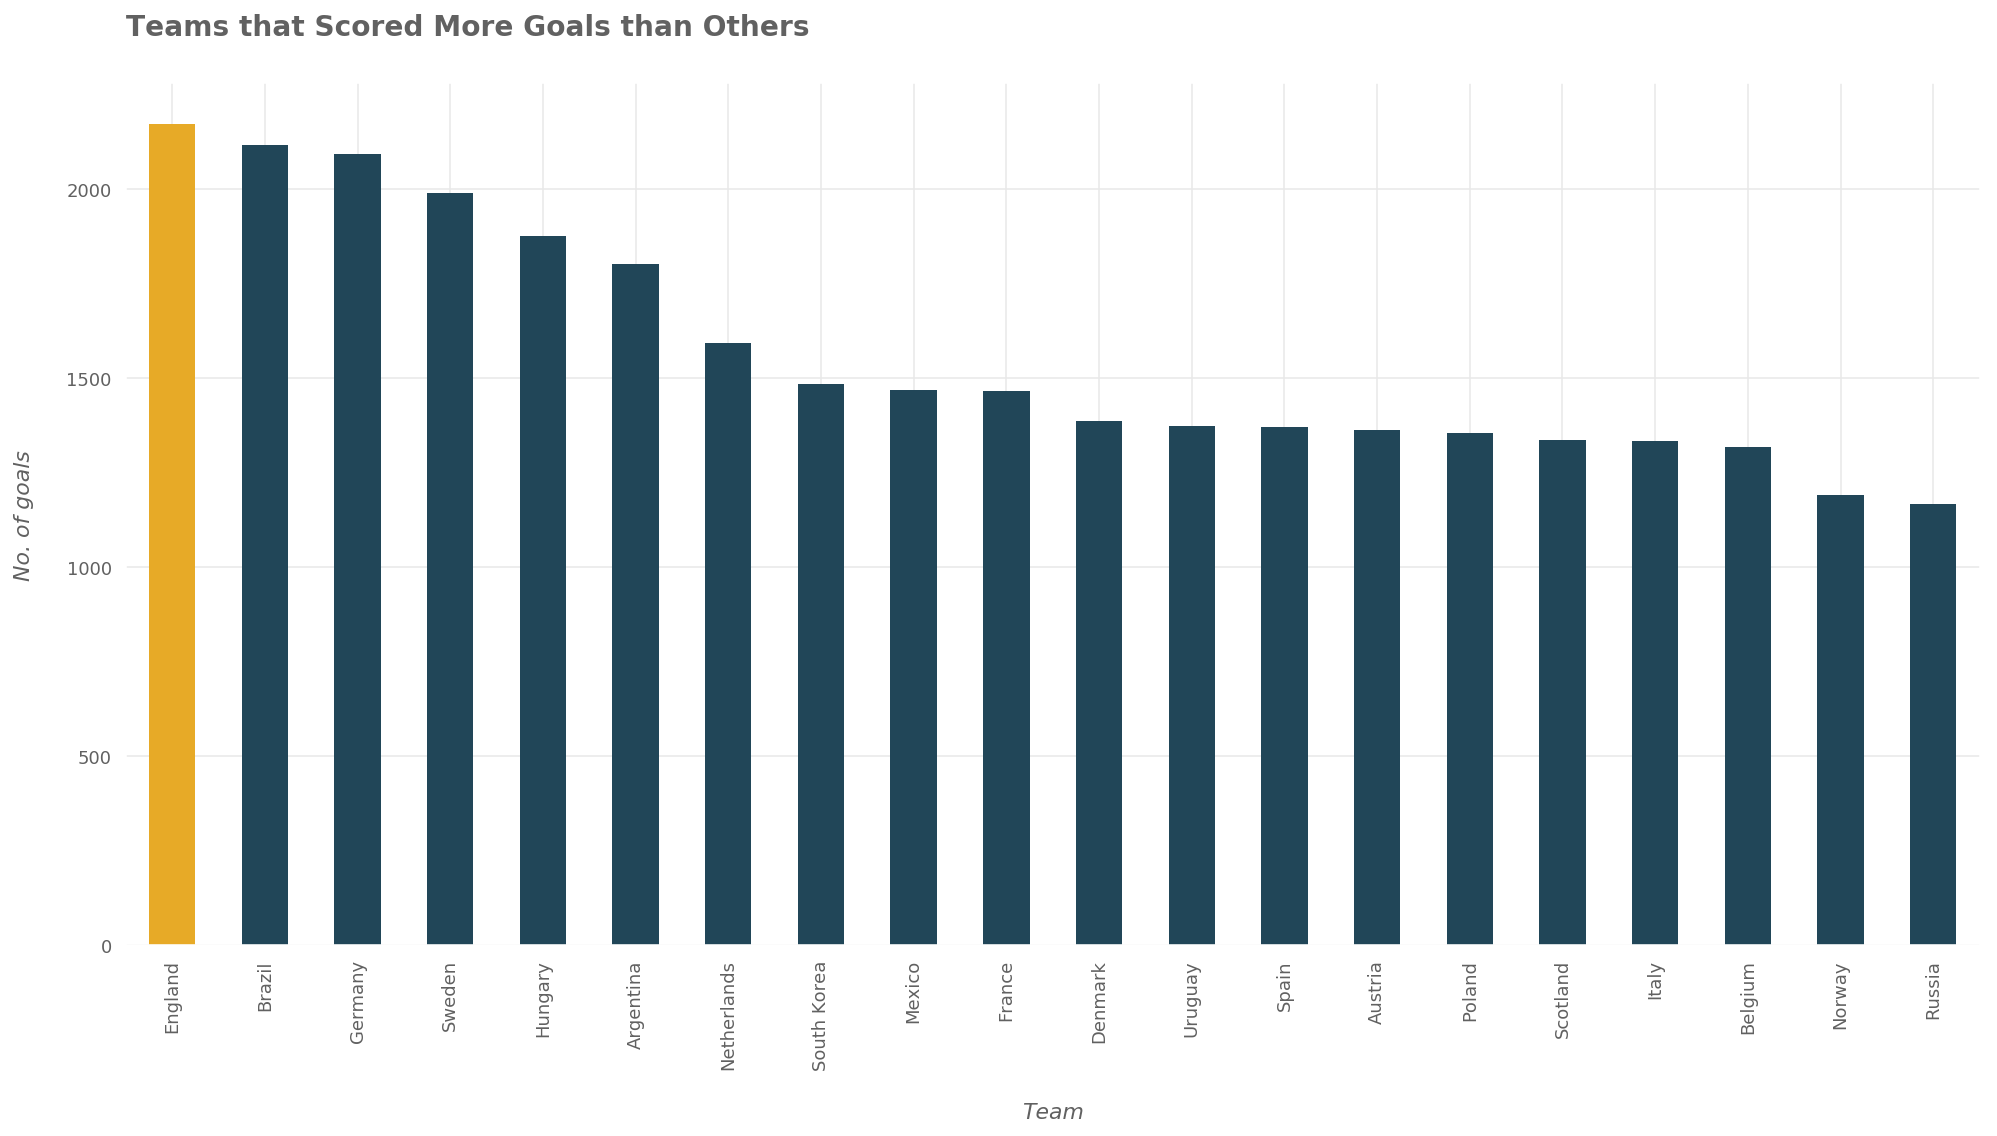

In [63]:
cdf1 = df[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = df[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
display(cdf.head())
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
cdf.iloc[1:, 0] = 0
ax = cdf.plot(kind='bar', color='#e7aa27', legend=False, ax=ax);
plot_conf(ax, xlbl='Team', ylbl='No. of goals', t='Teams that Scored More Goals than Others')
plt.tight_layout()
plt.savefig('fban-scored-more.png', dpi=300)

We can see that England has scored more goals than all other countries throughout history; it scored 2130 goals. After England comes Germany with 2081 goals then Brazil with 2078 goals.

# Which Team Scored the Largest Number of Goals in World Cup?

,score
team,
Brazil,229
Germany,226
Argentina,137
Italy,128
France,120


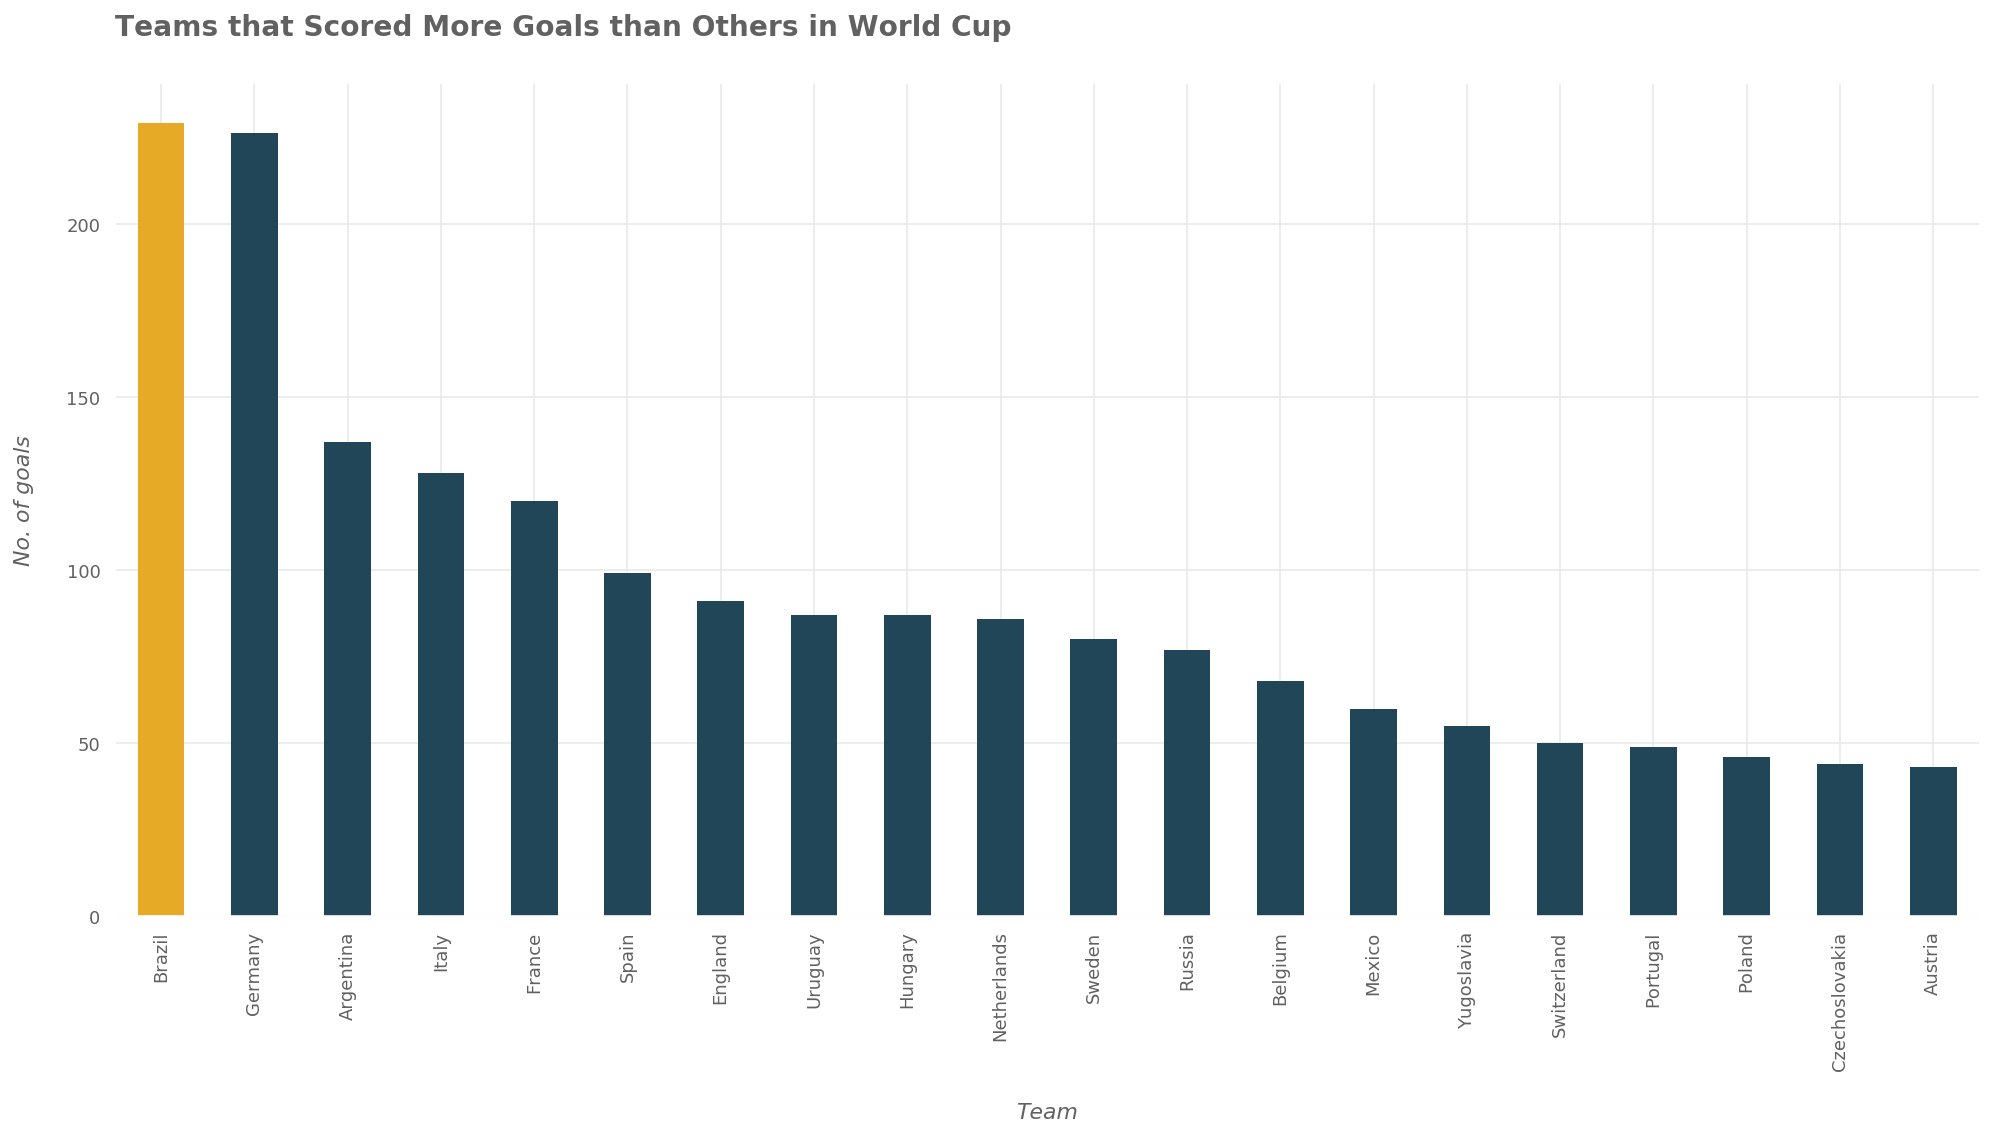

In [65]:
cdf1 = df[df['tournament'] == 'FIFA World Cup'][['home_team', 'home_score']].rename(
    columns={'home_team': 'team', 'home_score': 'score'})
cdf2 = df[df['tournament'] == 'FIFA World Cup'][['away_team', 'away_score']].rename(
    columns={'away_team': 'team', 'away_score': 'score'})
cdf = pd.concat([cdf1, cdf2], axis=0, ignore_index=True)
cdf = cdf.groupby('team').sum().sort_values(by='score', axis=0, ascending=False).head(20)
display(cdf.head())
ax = cdf.plot(kind='bar', figsize=(14,8), color='#214658', legend=False);
cdf.iloc[1:, 0] = 0
ax = cdf.plot(kind='bar', color='#e7aa27', legend=False, ax=ax);
plot_conf(ax, xlbl='Team', ylbl='No. of goals', t='Teams that Scored More Goals than Others in World Cup')
plt.tight_layout()
plt.savefig('fban-scored-more-wc.png', dpi=300)

Now we get a different ranking. We can see that Germany now comes first with 224 goals in World Cup, followed by Brazil with 221 goals, followed by Argentina with 131 goals. We can see that the differences between teams in this graph are bigger.

## Which Teams Played Against Each Other the Most?

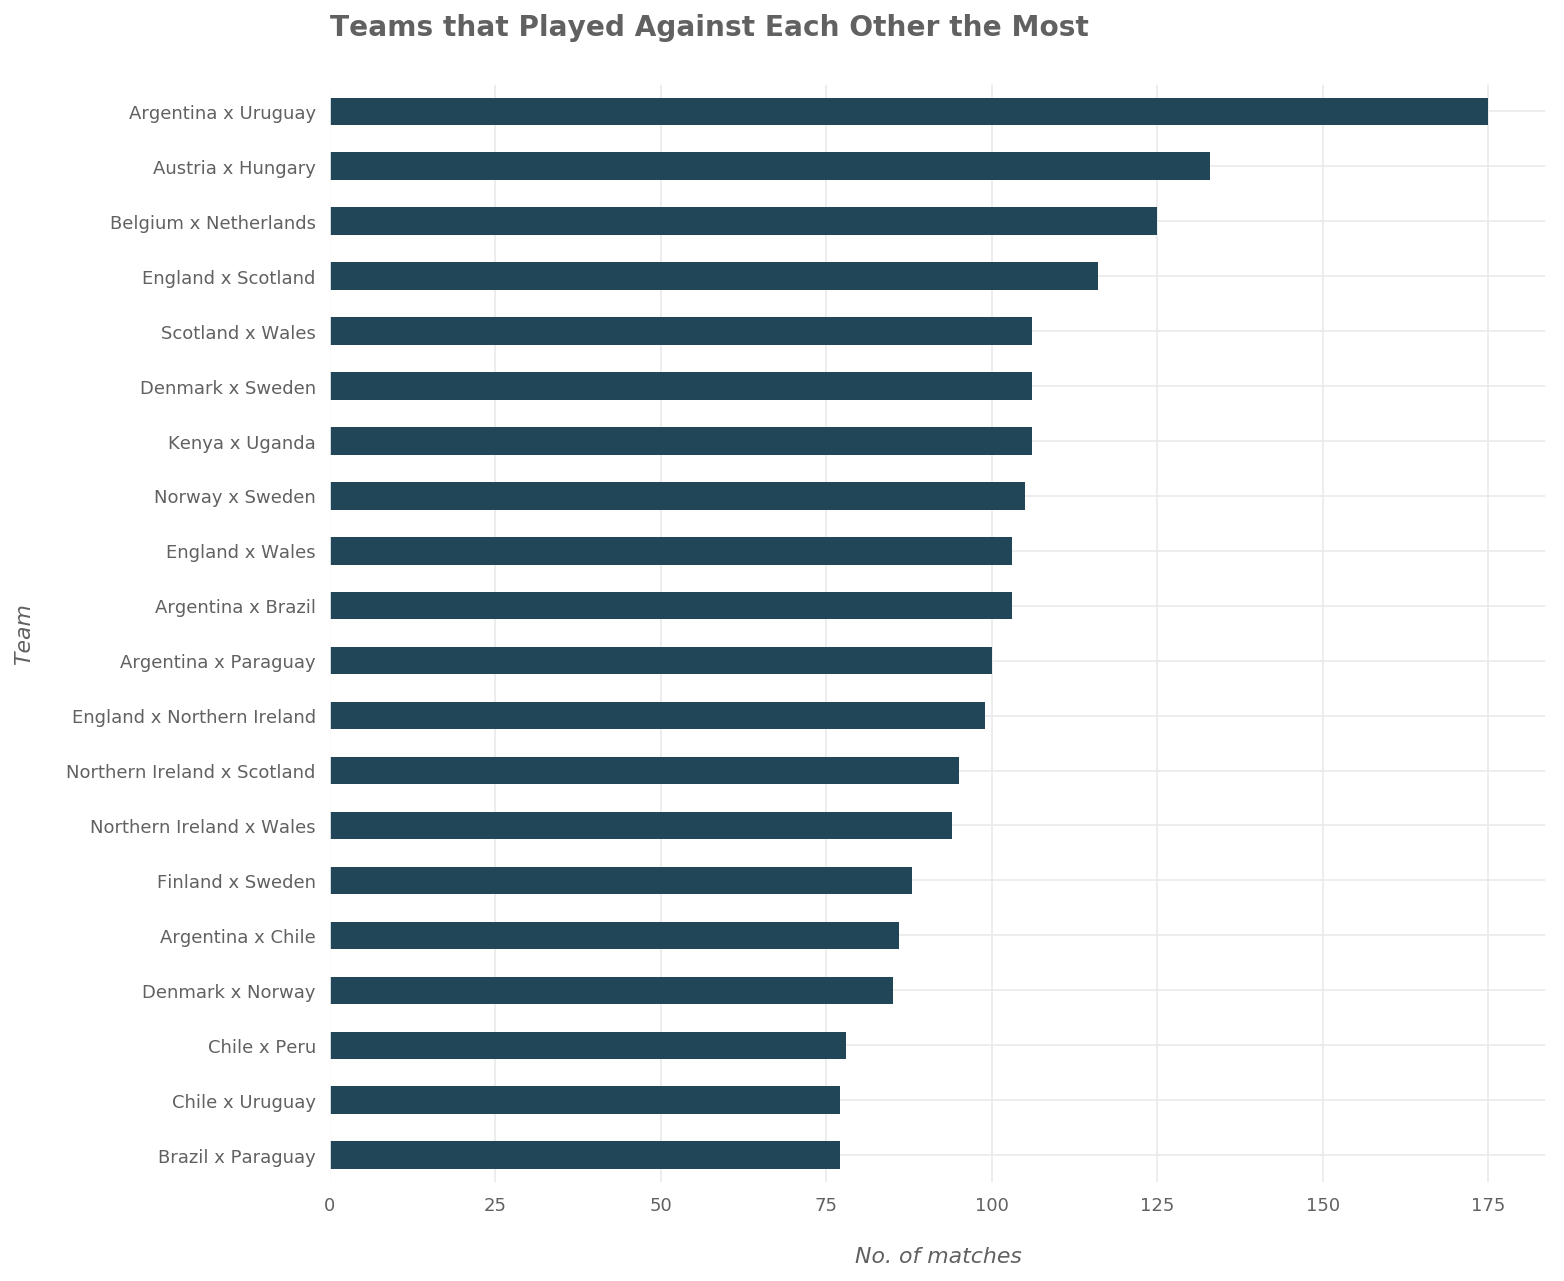

In [38]:
playing_teams = []
for i in range(df.shape[0]):
    two_teams = [df.loc[i, 'home_team'], df.loc[i, 'away_team']]
    two_teams.sort()
    playing_teams.append(tuple(two_teams))
common_playing_teams = Counter(playing_teams).most_common(20)
common_playing_teams = [(' x '.join(a), b) for a,b in common_playing_teams]
common_playing_teams = pd.DataFrame(common_playing_teams, columns=['Teams', 'No. of matches'])
common_playing_teams.index = common_playing_teams.Teams
common_playing_teams.drop('Teams', axis=1, inplace=True)
ax = common_playing_teams.sort_values(by='No. of matches', ascending=True).plot(kind='barh', figsize=(11,9), 
                                                                                color='#214658', legend=False);
plot_conf(ax, xlbl='No. of matches', ylbl='Team', t='Teams that Played Against Each Other the Most')
plt.tight_layout()
plt.savefig('fban-against-eachother.png', dpi=300)

In [67]:
common_playing_teams.sort_values(by='No. of matches', ascending=False)

,No. of matches
Teams,
Argentina x Uruguay,175
Austria x Hungary,133
Belgium x Netherlands,125
England x Scotland,116
Scotland x Wales,106
Denmark x Sweden,106
Kenya x Uganda,106
Norway x Sweden,105
England x Wales,103


## Do Friendly Matches Have Less or More Goals than Non-Friendly Matches?

In [39]:
fr_goals = df[df['tournament'] == 'Friendly']['total_goals'].sum()
fr_count = df[df['tournament'] == 'Friendly']['total_goals'].shape[0]
fr_avg_goals = fr_goals / fr_count

In [40]:
nonfr_goals = df[df['tournament'] != 'Friendly']['total_goals'].sum()
nonfr_count = df[df['tournament'] != 'Friendly']['total_goals'].shape[0]
nonfr_avg_goals = nonfr_goals / nonfr_count

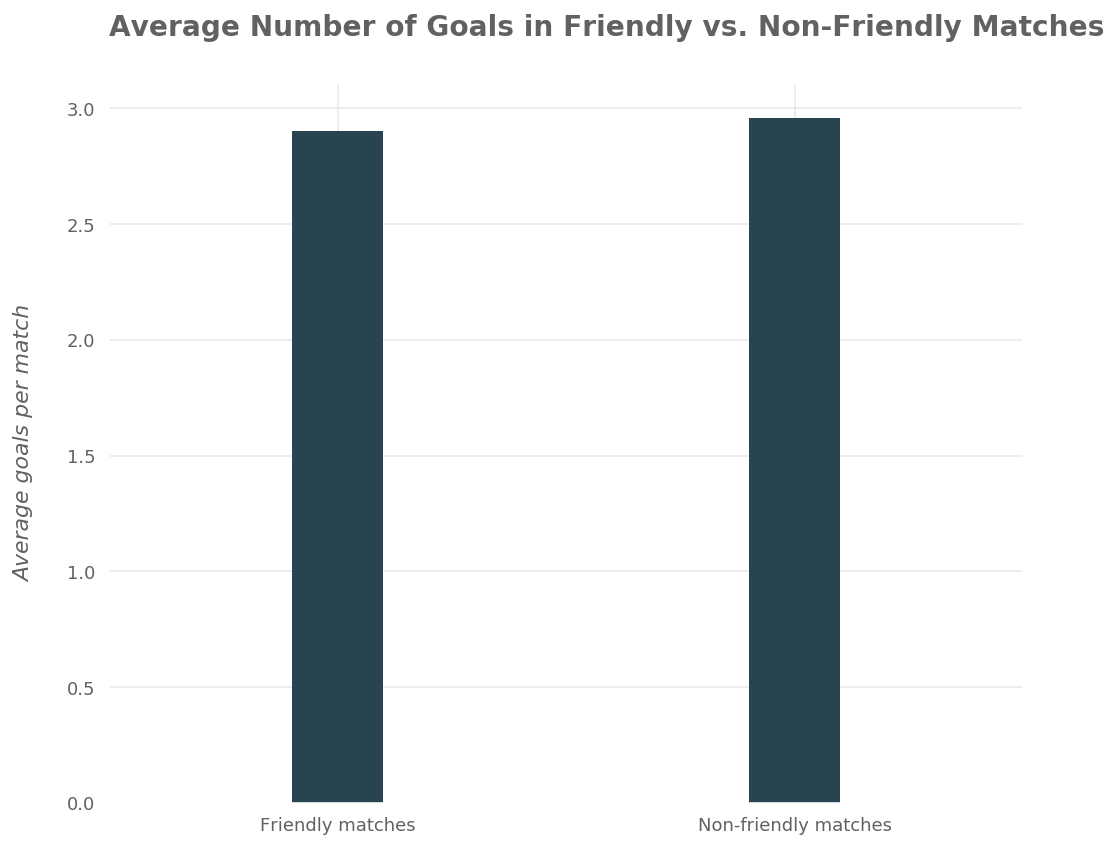

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['Friendly matches', 'Non-friendly matches'], y=[fr_avg_goals, nonfr_avg_goals], 
            color='#214658', ax=ax);
plot_conf(ax, xlbl='', ylbl='Average goals per match', t='Average Number of Goals in Friendly vs. Non-Friendly Matches')
change_width(ax, .2)
plt.tight_layout()
plt.savefig('fban-fr-vs-non.png', dpi=300)

## Which Tournament Has More Goals than the Others?

In [42]:
cdf = df[['tournament', 'total_goals']].copy()
tournament_num_matches = cdf.groupby('tournament')['total_goals'].count()
pd.DataFrame(tournament_num_matches).rename(columns={'total_goals': 'match_count'})

,match_count
tournament,
ABCS Tournament,20
AFC Asian Cup,319
AFC Asian Cup qualification,724
AFC Challenge Cup,100
AFC Challenge Cup qualification,92
...,...
Viva World Cup,56
WAFF Championship,97
West African Cup,54


In [43]:
df[df['tournament'] == 'Merdeka Tournament']['total_goals'].shape

(503,)

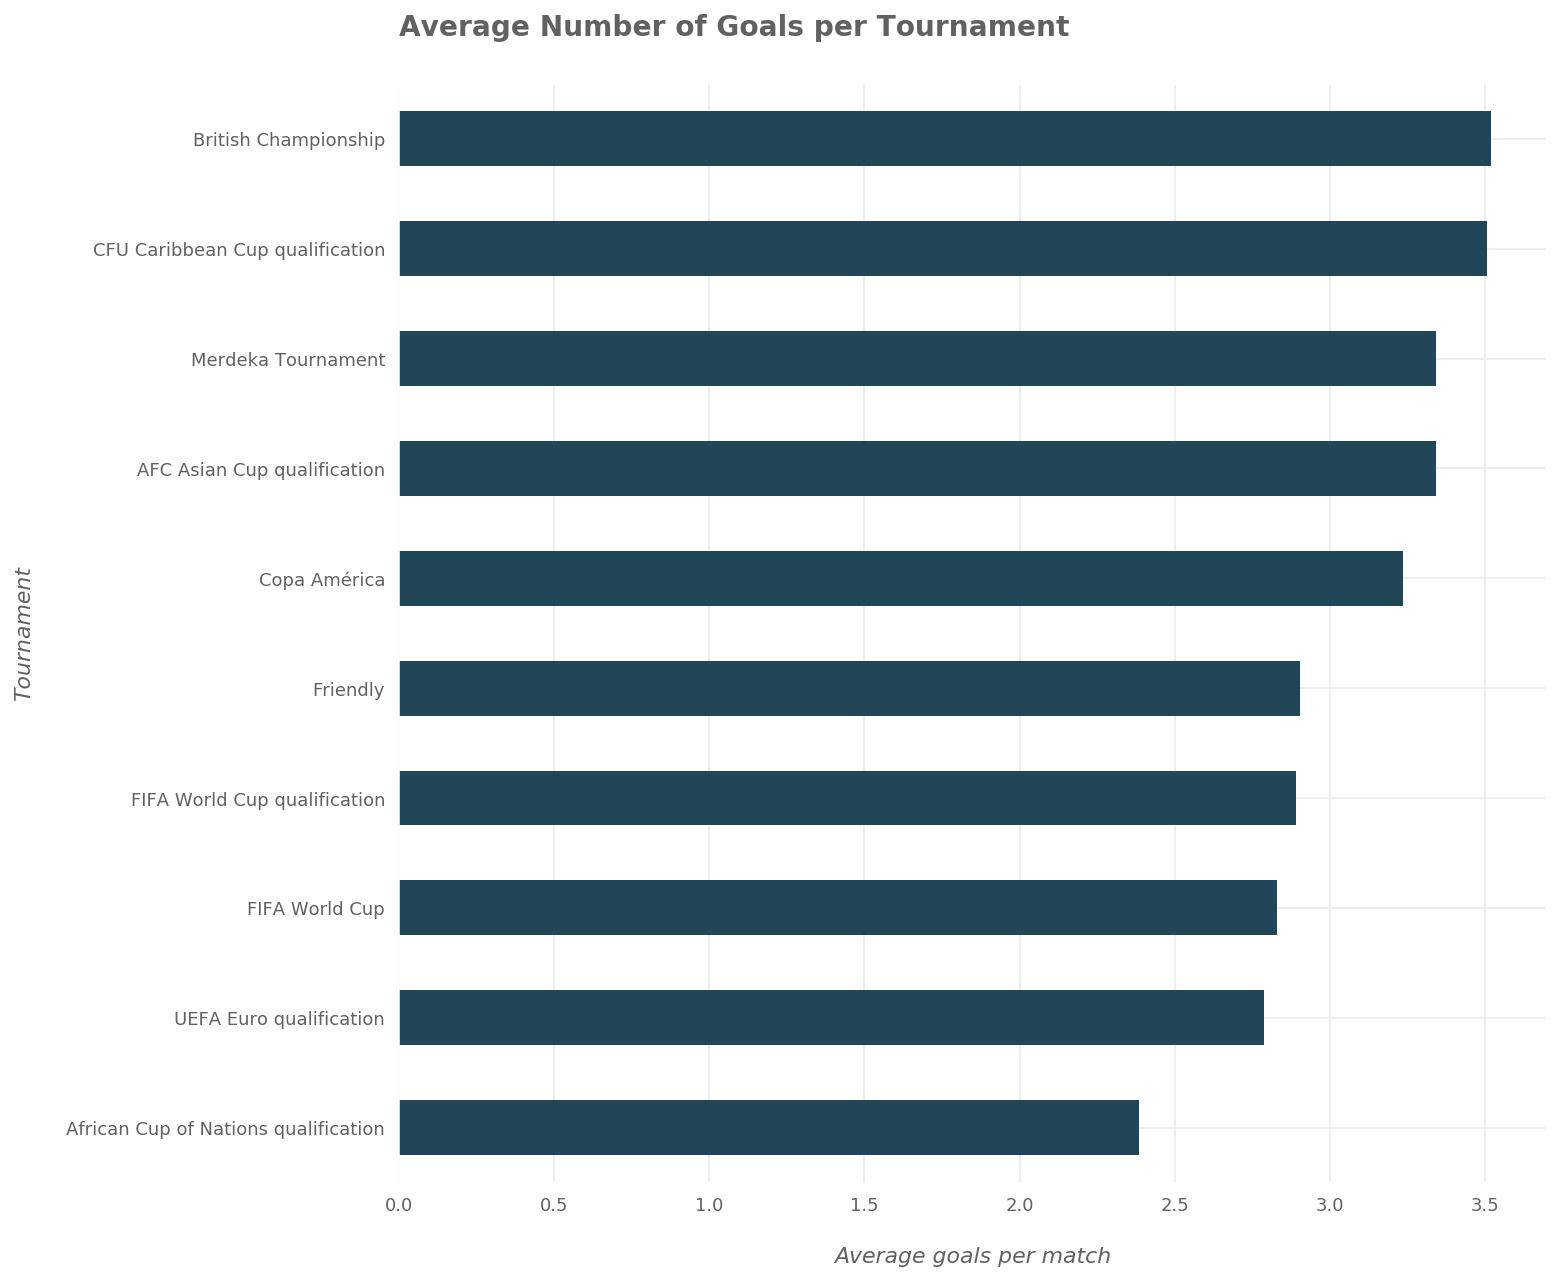

In [69]:
cdf1 = df[['tournament', 'total_goals']].copy()
tournament_num_matches = cdf1.groupby('tournament')['total_goals'].count()
tournament_num_matches = pd.DataFrame(tournament_num_matches).rename(columns={'total_goals': 'match_count'})
cdf2 = pd.DataFrame(df.groupby('tournament')['total_goals'].sum().sort_values(ascending=False).head(10).sort_values())
cdf2['avg_goals'] = 0
for i in range(cdf2.shape[0]):
    t = cdf2.index[i]
    mc = tournament_num_matches.loc[t, 'match_count']
    cdf2.iloc[i, 1] = cdf2.iloc[i, 0] / mc
cdf2.drop('total_goals', axis=1, inplace=True)
cdf2.sort_values(by='avg_goals', inplace=True)
ax = cdf2.plot(kind='barh', figsize=(11,9), color='#214658', legend=False);
# cdf2.iloc[0:-1, 0] = 0
# ax = cdf2.plot(kind='barh', color='#f36f38', legend=False, ax=ax);
plot_conf(ax, xlbl='Average goals per match', ylbl='Tournament', t='Average Number of Goals per Tournament')
plt.tight_layout()
plt.savefig('fban-tour-goals.png', dpi=300)

In [70]:
# exact numbers
cdf2

,avg_goals
tournament,
African Cup of Nations qualification,2.383416
UEFA Euro qualification,2.789451
FIFA World Cup,2.831111
FIFA World Cup qualification,2.890141
Friendly,2.902709
Copa América,3.235070
AFC Asian Cup qualification,3.341160
Merdeka Tournament,3.341948
CFU Caribbean Cup qualification,3.506601


Finished by [Ammar Alyousfi](http://ammar-alyousfi.com/) in 2020